# Clustering

## Qué es el clustering

Clustering es un algoritmo de Machine Learning de la rama del aprendizaje no supervisado (no hay una variable objetivo) que consiste en encontrar las similitudes o características que hace muy parecido a una observación con otra para hacer pequeños grupos o **clusters**; a diferencia de la clasificación, en el clustering no contamos con una variable objetivo .

![](clustering.PNG)

## Cuándo usar clustering

**Cuándo utilizarlo**

- Quiero mayor contexto de mi conjunto de datos: segmentar grupos por similitudes para luego analizarlos.
- Detección de outliers: un cluster muy pequeño podría indicar que esos datos no pertenecen al resto de los clusters.
- Para hacer segmentaciones o agrupaciones sin tener una variable objetivo.
- Realizar tareas manuales de etiquetado de grupos.

**Qué puedo lograr utilizando clustering**

- Clasificación del tráfico de una página.
- Segmentación de clientes por su perfil y consumo.
- Clasificación de contenido.
- Identificar comportamientos fraudulentos.
- Ciencia en los deportes.

**Clasificación vs Clustering**

![](clasificacionClustering.PNG)

## Cómo evaluar modelos de clustering

La forma usual de evaluar un modelo de clustering es con el **coeficiente de silueta** $$S = \frac{b - a}{max(a, b)}$$ donde:
- $a$ es el promedio de las distancias (disimilitudes) de la observación $i$ con las demás observaciones del mismo cluster al que pertenece $i$.
- $b$ es la distancia mínima a otro cluster que no es el mismo en el que está la observación $i$. Ese cluster es la segunda mejor opción para $i$ y se le denomina vecindad de $i$.

![](silueta.PNG)

Entre más alejado de otro cluster (no están uno encima del otro) entonces tendrá un índice de silueta mayor (muy largo, como el grupo 1).

En el grupo 0 vemos que hay algunos puntos o siluetas que son negativos y esto se da porque están muy cerca a otro cluster (en este caso, el grupo 2) y se produce un overlap.

Entonces, el **coeficiente de silueta** va desde -1 hasta 1, donde 1 es que no hay overlap con otros grupos, 0 que no está clasificado de la mejor manera y -1 es que definitivamente no pertenece al cluster en el que está.

La línea punteada es el promedio del coeficiente de silueta en este clustering; en este caso es de 0.6 lo que indica que es una clasificación aceptable. Lo que buscamos es que el **promedio del coeficiente de silueta del clustering sea lo más cercano a 1**.

## Primer clustering

### Librerías

In [1]:
#%conda update threadpoolctl

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### Cargar los datos

Importamos los datos del dataset *make_blobs*.

In [3]:
# 100 datapoints; 4 grupos; 2 características para definir los grupos; desviación estándar de los clusters
x, y = make_blobs(n_samples = 100, centers = 4, n_features = 2, cluster_std = [1, 1.5, 2, 2], random_state = 42)
print(x, y, sep = "\n")

[[-10.53191519   4.29382847]
 [ -5.25259276  -9.34183823]
 [ -2.97867201   9.55684617]
 [ -4.07403857  -9.68381172]
 [ -8.12275304   8.44509197]
 [ -8.86069984  -8.01270505]
 [  5.13677398   3.43648737]
 [  4.310371     2.50883854]
 [  4.78549516   3.42613717]
 [ -3.6601912    9.38998415]
 [ -3.05358035   9.12520872]
 [ -6.42470732  -4.26582408]
 [ -5.83574406  -6.28614025]
 [  2.98037638   0.17885975]
 [ -1.77073104   9.18565441]
 [-10.98011275   8.28846775]
 [ -8.28494616   8.97788941]
 [  4.53186365   3.47846903]
 [-10.60604263   7.63097313]
 [ -7.89185251   7.17786509]
 [ -2.97261532   8.54855637]
 [ -8.99253118   8.00582687]
 [ -9.73135766   9.0363205 ]
 [  5.18197224   4.28022453]
 [  4.58613978   4.32013517]
 [ -2.96983639  10.07140835]
 [  2.51682272   1.3422017 ]
 [ -7.58699306   5.6092078 ]
 [-10.7876911    8.89769212]
 [ -9.35352861  -9.52102282]
 [ -8.23967663  -6.4156022 ]
 [  5.08405925   2.36475259]
 [ -7.26434912  -6.27701491]
 [ -6.5211366    5.68215828]
 [ -0.92998481

Creamos un dataframe.

In [4]:
df = pd.DataFrame({
    "x1" : x[:, 0],
    "x2" : x[:, 1],
    "y" : y
})
df.head()

x1        x2  y
0 -10.531915  4.293828  3
1  -5.252593 -9.341838  2
2  -2.978672  9.556846  0
3  -4.074039 -9.683812  2
4  -8.122753  8.445092  3

La variable *y* solo la utilizaremos para comprobar los datos y no para realizar el clustering ya que no estamos haciendo clasificación sino clusterización.

### Visualización

Creamos una función para dibujar nuestros datos.

In [5]:
def plot2dClusters(x, y, ax):
    # Los clusters
    yUniques = pd.Series(y).unique()
    
    # Recorro los distintos grupos
    for cluster in yUniques:
        # De x solo necesito cuando y sea igual al cluster en el que estoy
        x[y == cluster].plot(
            # Título
            title = f"{len(yUniques)} Clusters",
            # Scatterplot
            kind = "scatter",
            x = "x1",
            y = "x2",
            # Forma del punto, en este caso el número del grupo
            marker = f"${cluster}$",
            # Tamaño de los puntos
            s = 80,
            ax = ax
        )

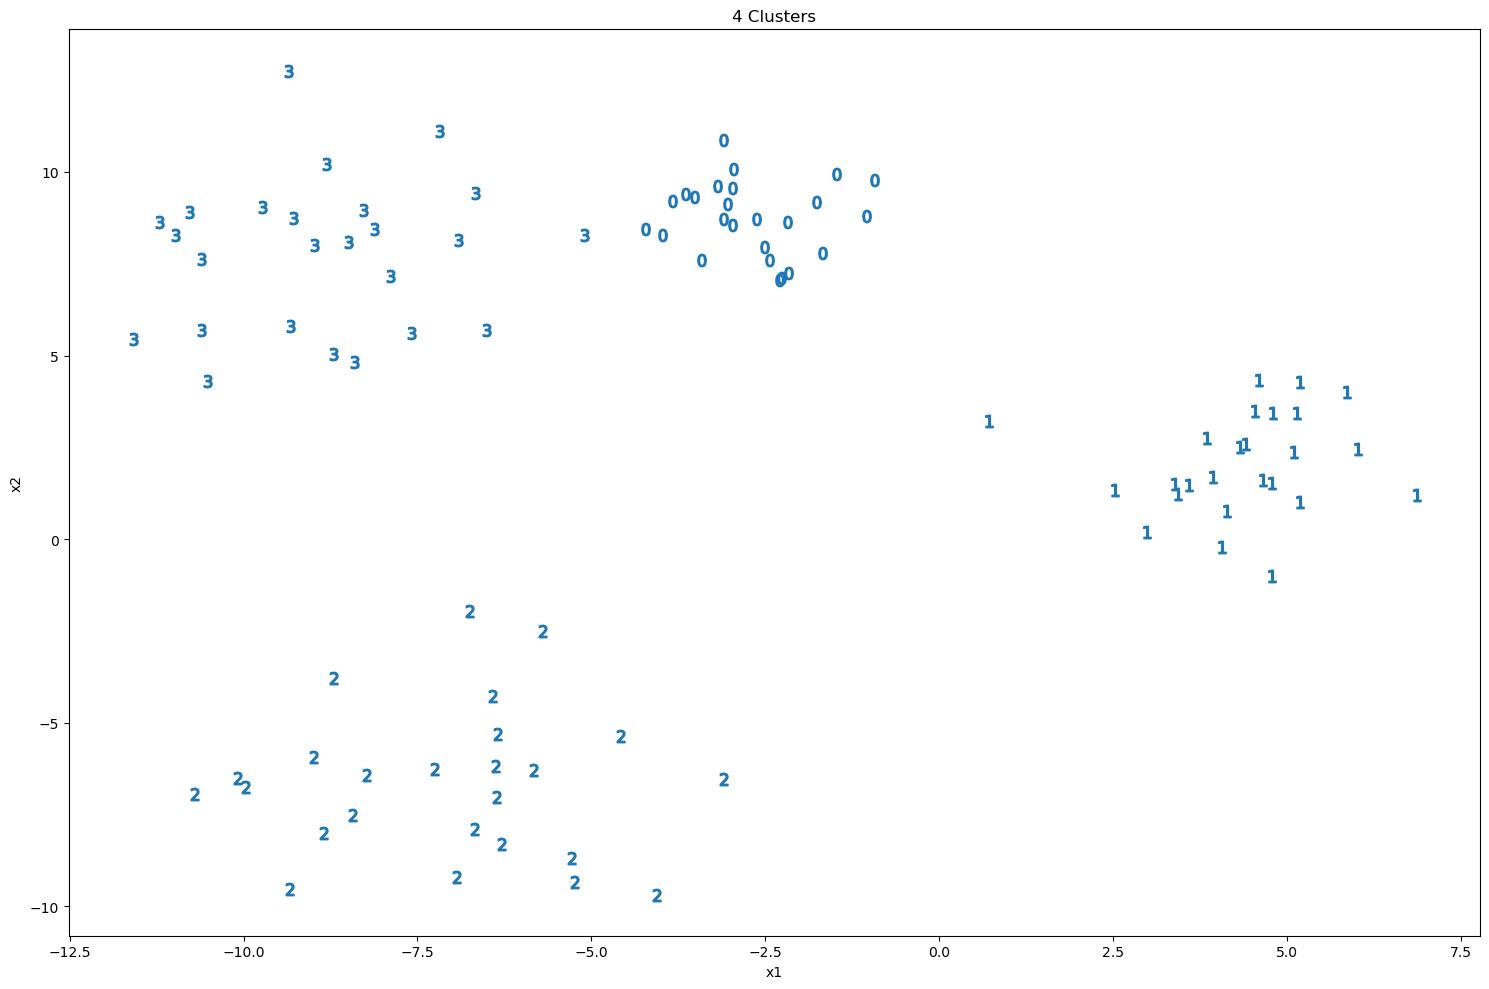

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
x, y = df[["x1", "x2"]], df["y"]
plot2dClusters(x, y, ax)
fig.tight_layout()

### Aplicando clustering

Utilizaremos el algoritmo de KMeans.

In [7]:
# Creamos el modelo con 5 grupos como respuesta
kmeans = KMeans(n_clusters = 5, random_state = 42, max_iter = 1000)
# Entrenamos el modelo
predicts = kmeans.fit_predict(x)

Visualizamos el resultado.

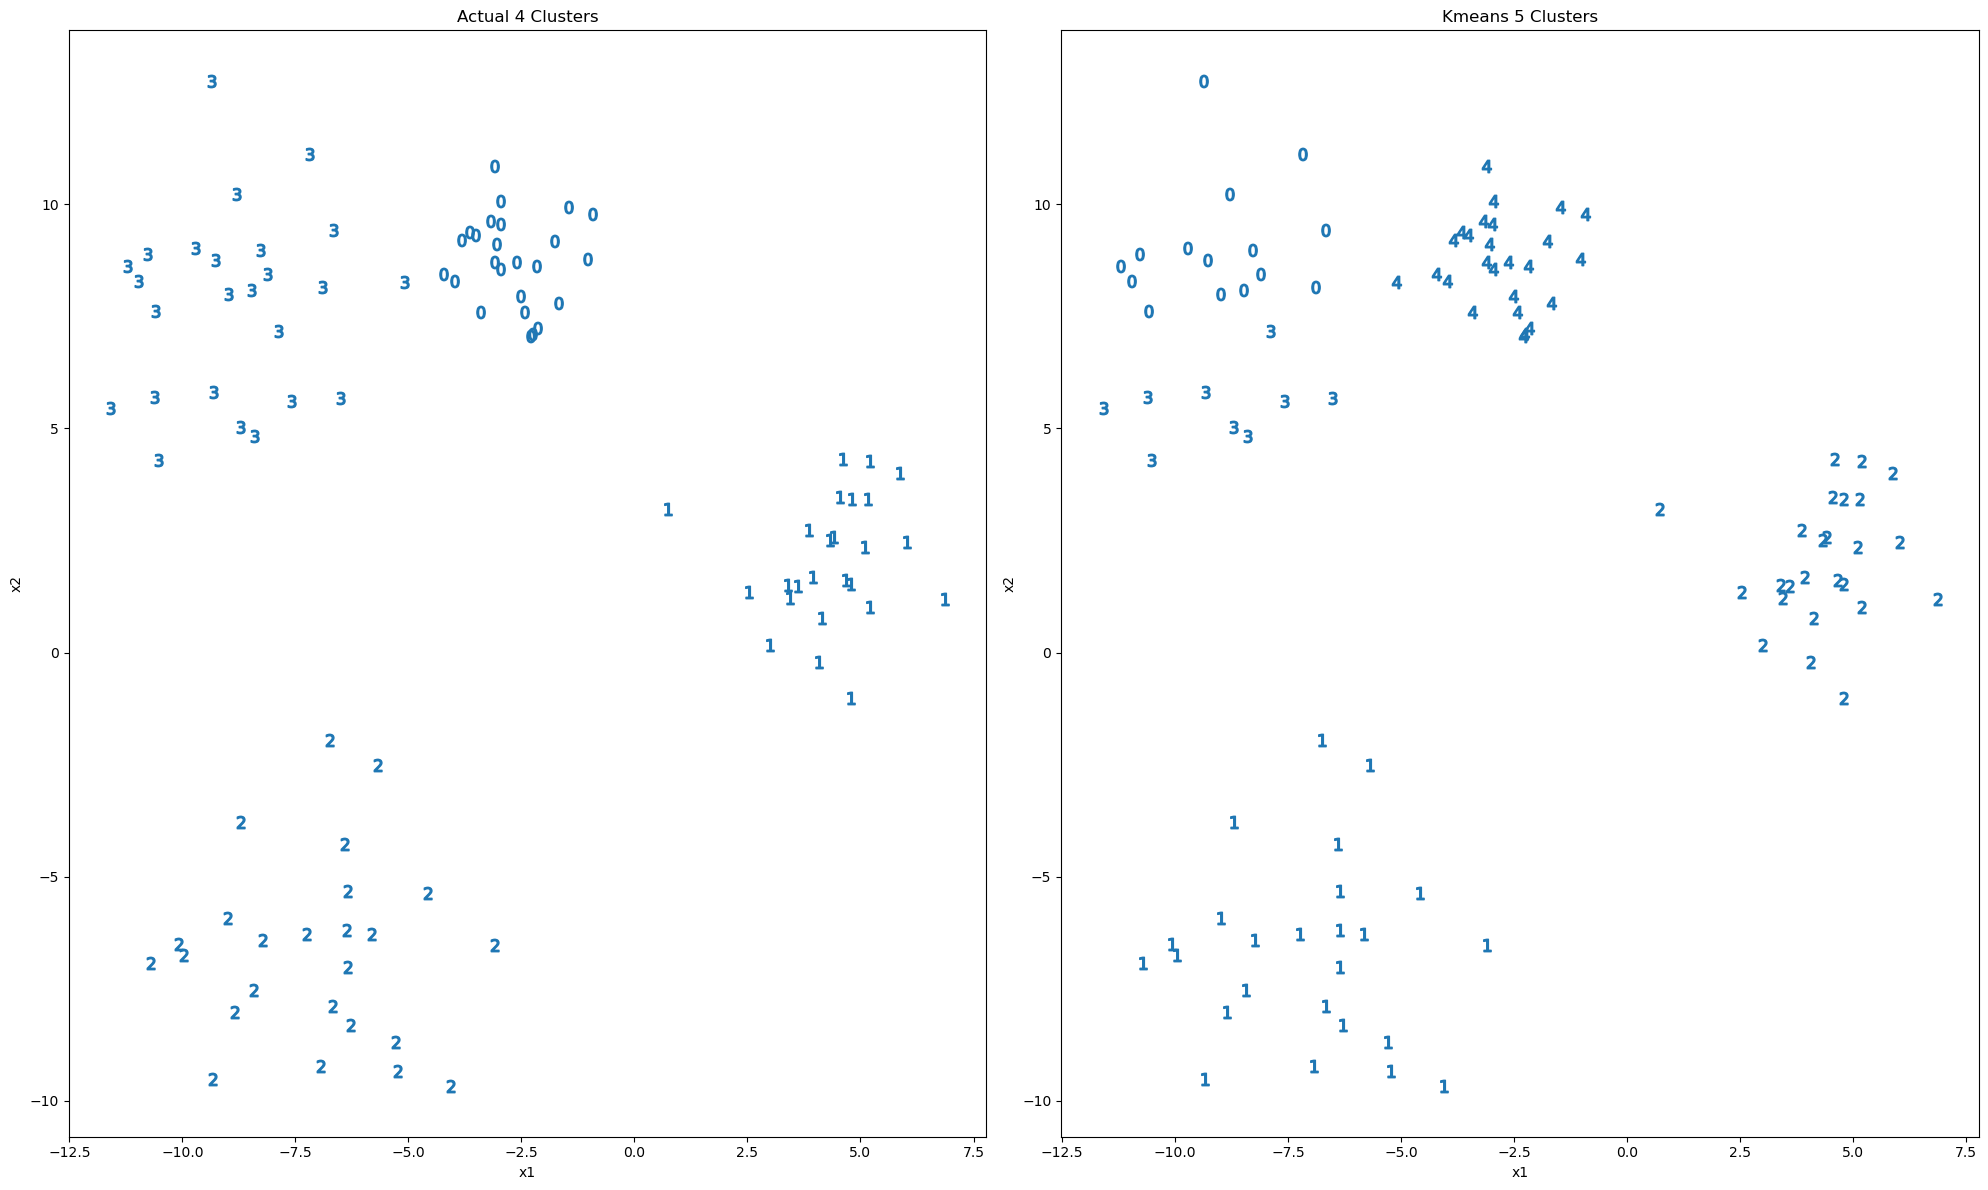

In [8]:
fig, axs = plt.subplots(1,2, figsize=(20,12))
plot2dClusters(x, y, axs[0])
plot2dClusters(x, predicts, axs[1])

axs[0].set_title(f'Actual {axs[0].get_title()}')
axs[1].set_title(f'Kmeans {axs[1].get_title()}')
fig.tight_layout()

## K-Means

El algoritmo de K-Means son básicamente 5 pasos:
1. Tengo una cantidad inicial de clusters la cual debo indicar llamda **K**.
2. Ubico un centroide aleatoriamente para cada cluster que tenga.
3. Cada punto del conjunto de datos se le asigna al centroide más cercano.
4. Recalculo los centroides con el promedio de todos los puntos más cercanos a dicho centroide de manera que este se desplace al promedio del grupo.
5. Repetir los pasos 3 y 4 hasta que los centroides no se muevan.

![](kmeans.PNG)

El objetivo de la función de K-Means es reducir la distancia entre cada punto y su centroide elevada al cuadrado.

**Ventajas**
- Alto rendimiento.
- Simple.
- Resultados interpretables.
- Garantiza convergencia.
- Se adapta a nuevos datos.

**Desvenjatas**
- Es difícil replicar los mismos resultados.
- Le afectan los outliers ya que arrastran al centroide.
- Mejor rendimiento en datos esféricos.
- Debo elegir K manualmente.
- Afectado por alta dimensionalidad.

**Cuándo utilizar K-Means**
- Conozco o tengo alguna idea de la cantidad de clusters que espero.
- Quiero resultados rápidos.
- Quiero resultados interpretables.
- Tengo datos de forma esférica.
- Quiero resultados escalables.

![](formasEsfericas.PNG)

### Implementando K-Means

#### Liberías

In [9]:
#%pip install yellowbrick

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#### Cargar los datos

Vamos a generar los datos utilizando *make_blobs*.

In [11]:
# 500 datos; std de los clusters de 0.8, 4 clusters; 2 características; retornar los Centroides
X, y, centroids = make_blobs(n_samples = 500, cluster_std = 0.8, centers = 4, n_features = 2, return_centers = True)

Creamos los conjuntos de datos.

In [12]:
# Datos
df = pd.DataFrame({
    "x1" : X[:, 0],
    "x2" : X[:, 1],
    "y" : y
})

# Centroides
dfCentroids = pd.DataFrame({
    "x1" : centroids[:, 0],
    "x2" : centroids[:, 1]
})
df.head()

x1        x2  y
0  7.197253  0.450588  0
1  4.984914 -3.500947  2
2 -1.652422 -0.417509  3
3  0.994275  1.261241  3
4  5.774139 -3.882236  2

In [13]:
dfCentroids.head()

x1        x2
0  7.224404 -0.283053
1 -1.925953  7.434151
2  5.878371 -2.433165
3 -0.641894  0.880656

#### Visualización de los datos

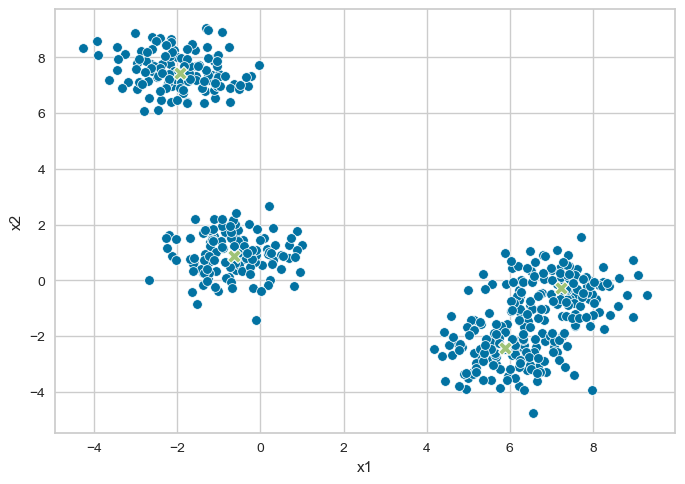

In [14]:
# Los puntos del conjunto de datos
sns.scatterplot(
    data = df,
    x = "x1",
    y = "x2"
)
# Centroides iniciales
sns.scatterplot(
    data = dfCentroids,
    x = "x1",
    y = "x2",
    marker = "X",
    s = 100
)
plt.show()

#### Aplicando K-Means

Creamos el modelo, lo entrenamos, hacemos las predicciones y las guardamos al igual que los centroides.

In [15]:
# Creamos el modelo con 3 clusters
kmeans = KMeans(n_clusters = 3, max_iter = 10000)
# Entrenamos el modelo y hacemos la clusterización y los guardamos en un df
dfCluster = kmeans.fit_predict(X)
# Añadimos una columna al conjunto de datos para especificar a qué cluster pertenece en base a la predicción
df["Cluster"] = dfCluster
# Guardamos los centroides de la predicción para luego graficar
kmeansCenters = kmeans.cluster_centers_
dfKmeansCenters = pd.DataFrame({
    "x1" : kmeansCenters[:, 0],
    "x2" : kmeansCenters[:, 1]
})


Graficamos.

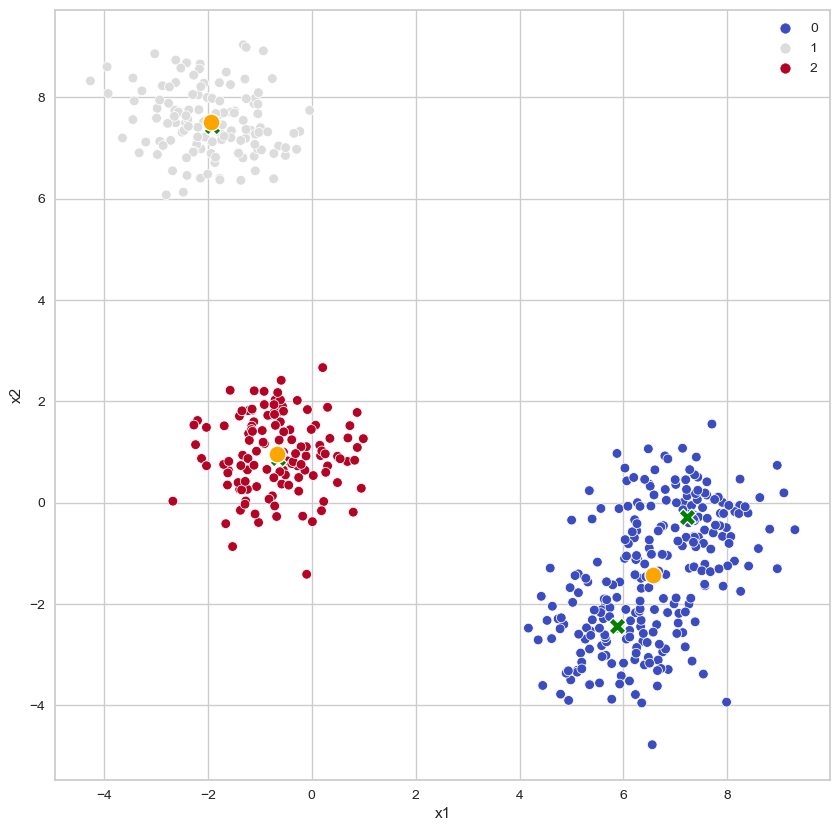

In [16]:
plt.figure(figsize = (10, 10))
# Datos
sns.scatterplot(
    data = df,
    x = "x1",
    y = "x2",
    hue = "Cluster",
    palette = "coolwarm"
)
# Centroides originales
sns.scatterplot(
    data = dfCentroids,
    x = "x1",
    y = "x2",
    marker = "X",
    color = "green",
    s = 150
)
# Centroides predicción
sns.scatterplot(
    data = dfKmeansCenters,
    x = "x1",
    y = "x2",
    marker = "o",
    color = "orange",
    s = 150
)
plt.show()

#### Encontrando K

Existen 2 formas para encontrar el K adecuado:

- **Elbow Method (método del codo)**: consiste en graficar la incercia (suma de los errores cuadráticos) con diferentes K y seleccionar el valor que se encuentre en el codo, cuando baja y comienza a aplanarse a medida que aumentan los clusters. No queremos el punto más bajo sino ese codo donde comienza a disminuir la distancia entre cada punto y su centroide.<br>
![](elbow.PNG) ![](wcss.PNG)

- **Coeficiente de Silueta**: $$S = \frac{b - a}{max(a, b)}$$ donde:
    - $a$ es el promedio de las distancias (disimilitudes) de la observación $i$ con las demás observaciones del mismo cluster al que pertenece $i$.
    - $b$ es la distancia mínima a otro cluster que no es el mismo en el que está la observación $i$. Ese cluster es la segunda mejor opción para $i$ y se le denomina vecindad de $i$.
    
Lo que buscamos es que el **promedio del coeficiente de silueta del clustering sea lo más cercano a 1**.

![](silueta.PNG)

Crearemos una función para crear el modelo, entrenarlo y visualizar los resultados dependiendo del número de clusters que especifiquemos.

In [17]:
def plotClusters(k):
    # Creamos el modelo con k clusters
    kmeans = KMeans(n_clusters = k, max_iter = 100000)
    # Entrenamos el modelo y hacemos la clusterización y los guardamos en un df
    dfCluster = kmeans.fit_predict(X)
    # Añadimos una columna al conjunto de datos para especificar a qué cluster pertenece en base a la predicción
    df["Cluster"] = dfCluster
    # Guardamos los centroides de la predicción para luego graficar
    kmeansCenters = kmeans.cluster_centers_
    dfKmeansCenters = pd.DataFrame({
        "x1" : kmeansCenters[:, 0],
        "x2" : kmeansCenters[:, 1]
    })
    
    plt.figure(figsize = (10, 10))
    # Datos
    sns.scatterplot(
        data = df,
        x = "x1",
        y = "x2",
        hue = "Cluster",
        palette = "coolwarm"
    )
    # Centroides originales
    sns.scatterplot(
        data = dfCentroids,
        x = "x1",
        y = "x2",
        marker = "X",
        color = "green",
        s = 150
    )
    # Centroides predicción
    sns.scatterplot(
        data = dfKmeansCenters,
        x = "x1",
        y = "x2",
        marker = "o",
        color = "orange",
        s = 150
    )
    # Añadimos el título para saber el número de clusters
    plt.title(f"{k} Clusters")
    plt.show()

Probamos con K desde 3 hasta 6.

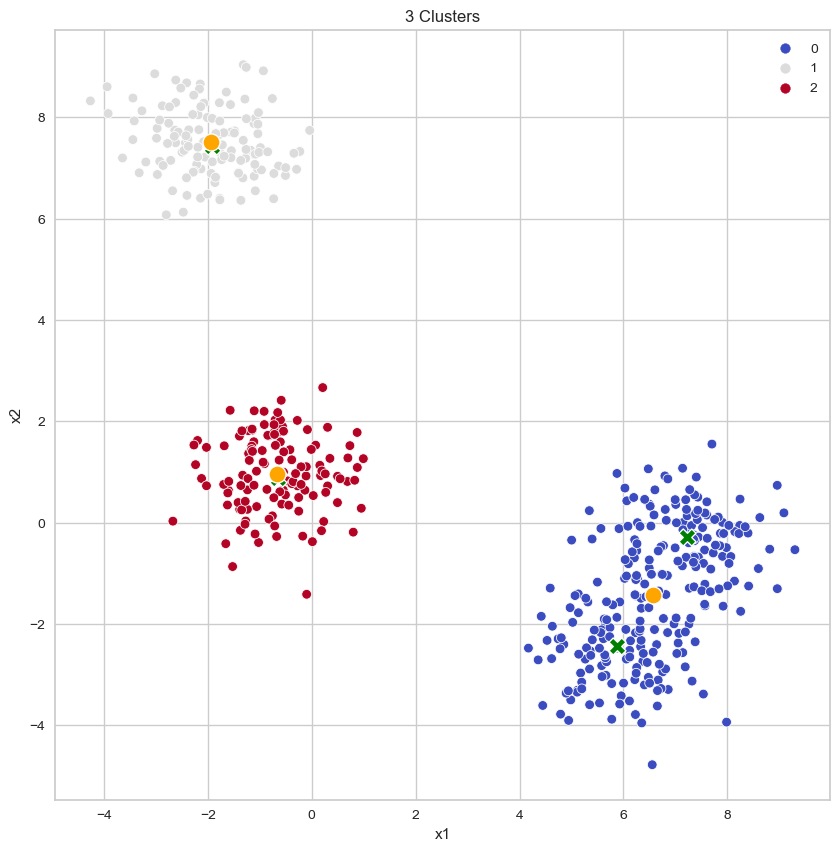

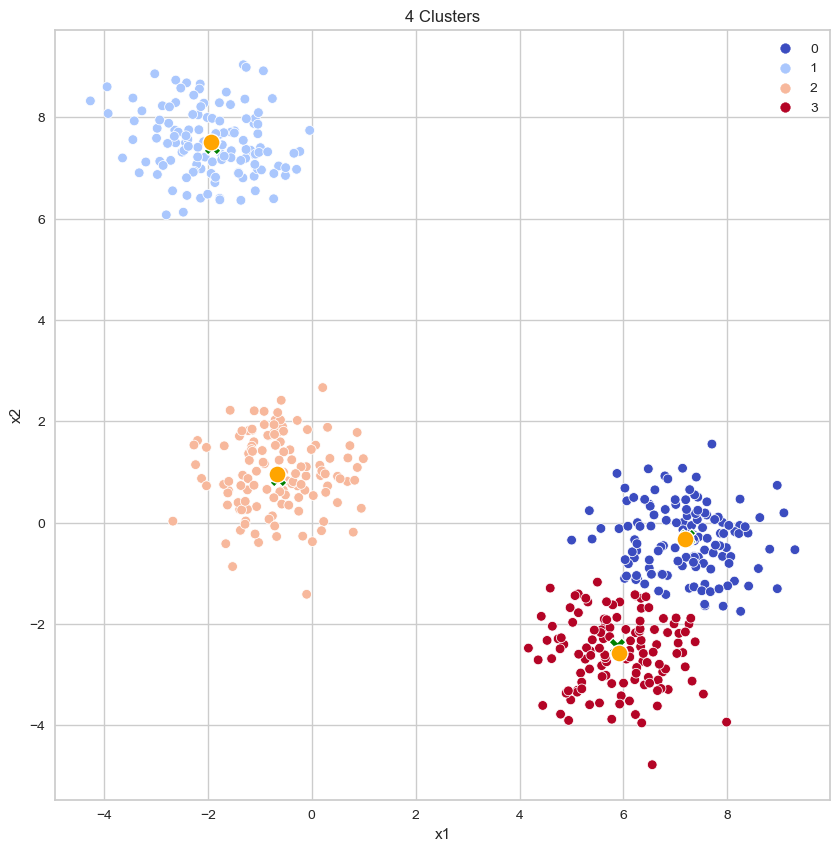

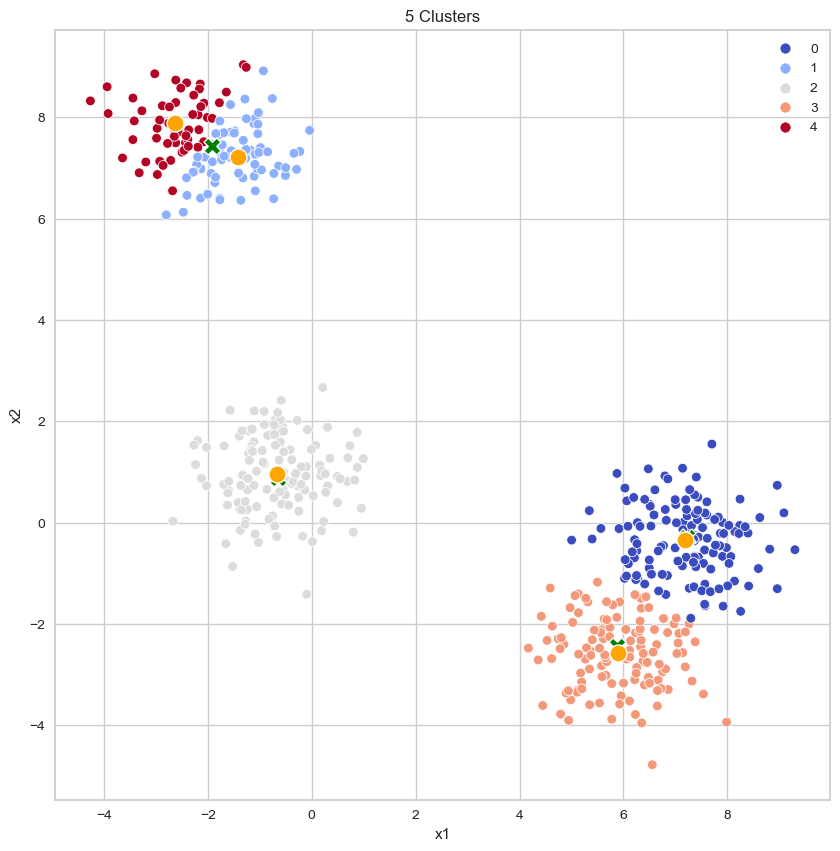

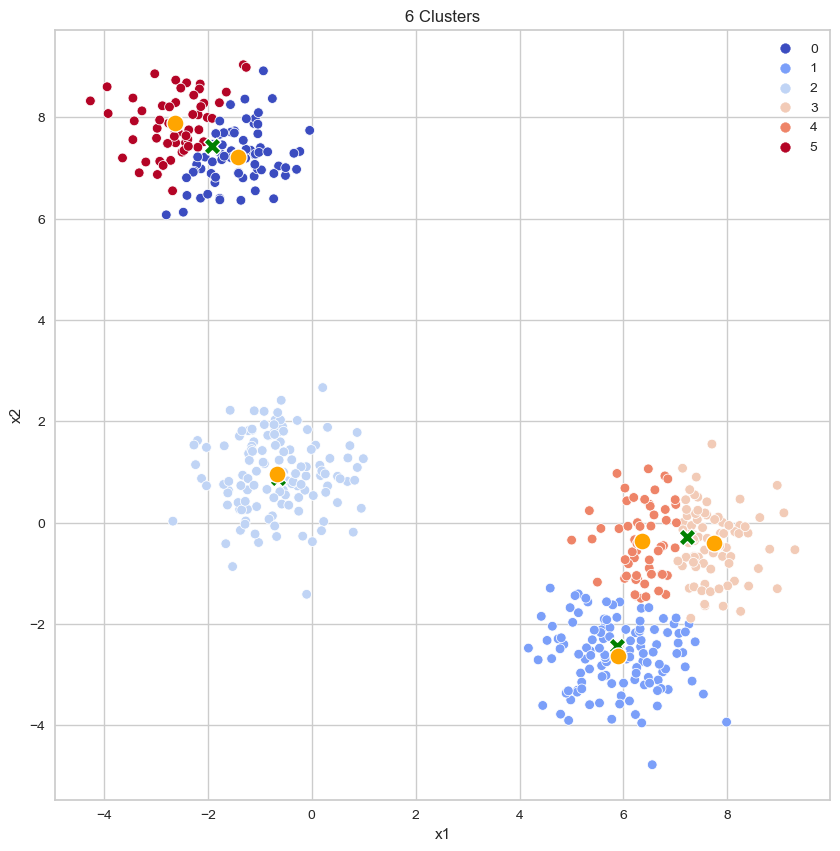

In [18]:
for i in range(3, 7):
    plotClusters(i)

Ahora utilizaremos el método del codo para encontrar el número de clusters sin tener que hacer iteraciones de gráficos.

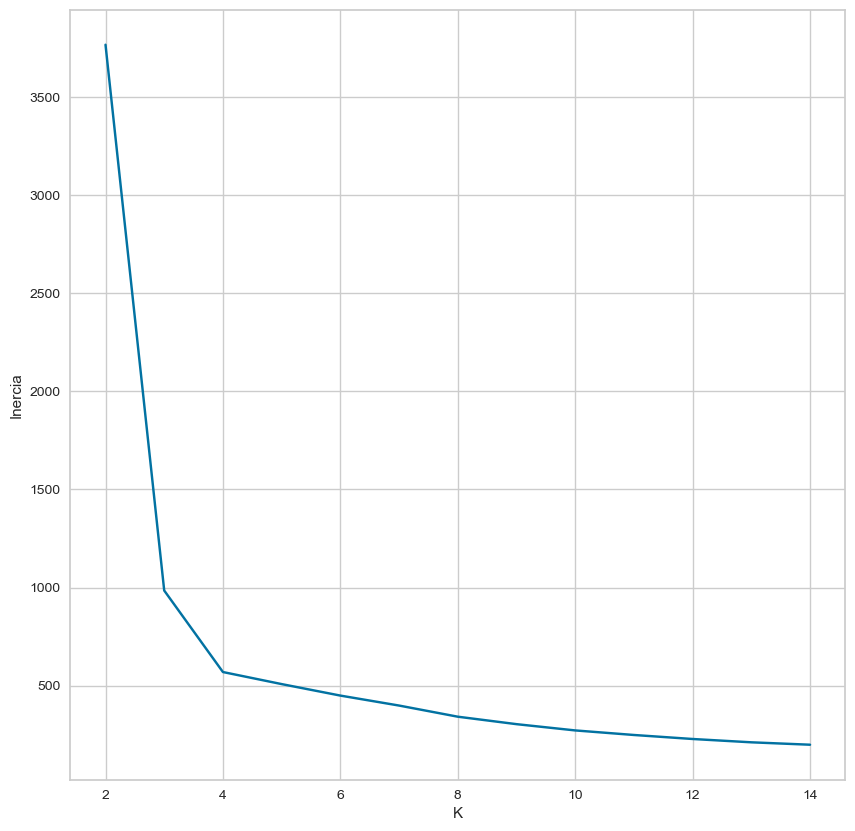

In [19]:
# Suma de los errores cuadráticos
SSE = []
# Posibles clusters
K = range(2, 15)
# Recorremos el rango de K
for k in K:
    # Creamos el modelo de K clusters
    kmeans = KMeans(n_clusters = k, max_iter = 100000)
    # Entrenamos el modelo
    kmeans = kmeans.fit(X)
    # Calculamos la inercia o suma de los errores cuadráticos y la agregamos a la lista
    SSE.append(kmeans.inertia_)
    
# Hacemos el gráfico del método del codo
plt.figure(figsize = (10, 10))
plt.plot(K, SSE, "bx-")
plt.xlabel("K")
plt.ylabel("Inercia")
plt.show()

También utilizaremos el coeficiente de silueta.

In [20]:
# Coeficiente de silueta
silhouetteScores = []
# Posibles clusters
K = range(2, 15)
# Recorremos el rango de K
for k in K:
    # Creamos el modelo de K clusters
    kmeans = KMeans(n_clusters = k, max_iter = 100000)
    # Entrenamos el modelo y hacemos predicciones
    predicts = kmeans.fit_predict(X)
    # Calculamos el coeficiente de silueta y lo agregamos a la lista
    silhouetteScores.append(silhouette_score(X, predicts))
    
# Hacemos el gráfico para observar el coeficiente de silueta
plt.figure(figsize = (10, 10))
plt.plot(K, silhouetteScores, "bx-")
plt.xlabel("K")
plt.ylabel("Coeficiente de Silueta")
plt.show()

Parece que la mejor clusterización se da cuando tenemos 3 clusters.

#### Evaluando el modelo

Vamos a evaluar el modelo utilizando 3 clusters.

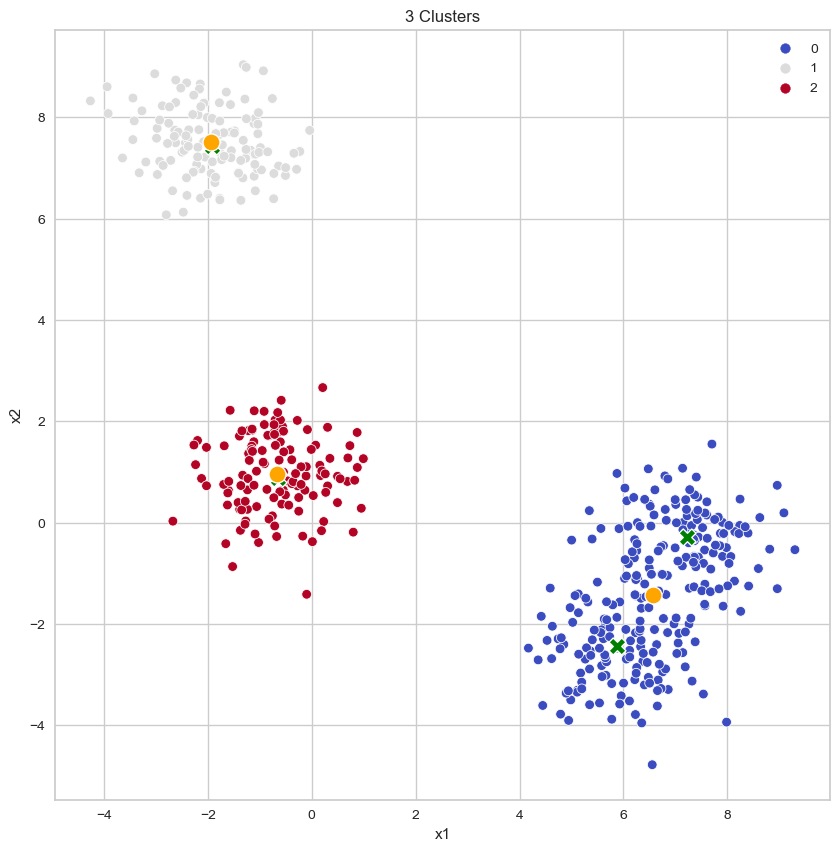

In [21]:
plotClusters(3)

Vamos a graficar utilizando el coeficiente de silueta.

In [22]:
plt.figure(figsize = (15, 10))
kmeans = KMeans(n_clusters = 3, max_iter = 10000)
# Utilizamos un visualizador del coeficiente de silueta al cual le mandamos el modelo
silhouetteVisualizer = SilhouetteVisualizer(kmeans, colors = "yellowbrick")
# Entrenamos el algoritmo pero desde el visualizador
silhouetteVisualizer.fit(X)
predicts = kmeans.fit_predict(X)
plt.show()
print(f"Coeficiente de Silueta: {silhouette_score(X, predicts)}")


Coeficiente de Silueta: 0.762028775542081


Vemos que con 3 clusters obtuvimos un coeficiente de silueta de aproximadamente 0.83. Como hay barras más largas que otras significa que esos grupos están más separados de los otros.

## Hierarchical Clustering (Clustering Jerárquico)

El clústering jerárquico se basa en que tengo las observaciones en un espacio vectorial y cada una de ellas va a evaluar su distancia frente al resto y se escogerá siempre la distancia más corta para crear un cluster <br>
![](hierarchical.PNG) <br>
Luego cada cluster evaluará la distancia al resto de los clusters y se escogerá el cluster más cercano. <br>
![](hierarchical2.PNG)<br>
Nuevamente se evalúa cuál es el cluster más cercano. <br>
![](hierarchical3.PNG)<br>
De esta manera se van creando clusters hasta tener uno solo muy grande. <br>
![](dendograma.PNG) <br>

Dentro del clustering jerárquico tenemos dos tipos: aglomerativo y divisivo.
- **Aglomerativo**: es el más usado. Las observaciones comienzan por separado y paso a paso se van juntando creando padres o abuelos en su jerarquía.
- **Divisivo**: comienza siempre con un cluster que abarca todas las observaciones y este se va dividiendo hasta encontrar clusters de un único elemento.

![](hierarchicalC.PNG)



**¿Cómo encuentran los clusters cuál es con el que deberían hacer match?**

Hay diferentes métodos llamados **Linkage** para que los clusters puedan encontrar con cuál deberían agruparse:
- **Simple linkage**: se enlazan las observaciones de dos clusters que son más cercanas entre sí.
- **Complete linkage**: se enlazan las observaciones de dos clusters que son más lejanas entre sí.
- **Average linkage**: se enlazan todas las observaciones de un cluster con todas las observaciones del otro cluster, se saca un promedio y las más cercanas se enlazan.
- **Ward linkage**: cada observación se lleva a otro cluster para evaluar su varianza y seleccionar el grupo en el que la varianza sea menor.

![](linkage.PNG)
![](linkage2.PNG)


**Ventajas**
- No es necesario saber previamente el número de clusters.
- Simple y fácil de entender.
- Resultados interpretables.
- Única ejecución, no es necesario iterar.
- Tengo la ayuda visual de un dendograma.

**Desventajas**
- No tiene un buen desempeño en datasets grandes.
- No tiene un objetivo matemático.
- Le afectan los outliers considerablemente.
- Requiere más capacidad de cómputo.

**Cuándo utilizar Herarchical Clustering**
- Quiero comprender los resultados de una manera visual y simple usando el dendograma.
- Tengo datasets pequeños o medianos.
- Desconozco la cantidad de clusters.
- Quiero resultados rápidos.

### Implementando Hierarchical Clustering

#### Librerías

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

#### Cargar los datos

Vamos a generar los datos utilizando *make_blobs*.

In [24]:
# 500 datos; std de los clusters de 0.8, 4 clusters; 2 características; retornar los Centroides
X, y, centroids = make_blobs(n_samples = 500, cluster_std = 0.8, centers = 4, n_features = 2, return_centers = True)

Creamos los conjuntos de datos.

In [25]:
# Datos
df = pd.DataFrame({
    "x1" : X[:, 0],
    "x2" : X[:, 1],
    "y" : y
})

# Centroides
dfCentroids = pd.DataFrame({
    "x1" : centroids[:, 0],
    "x2" : centroids[:, 1]
})
df.head()

x1        x2  y
0 -2.312701  6.026945  3
1 -2.514871  4.793924  3
2 -8.252884 -2.119409  1
3 -6.764448 -4.906380  2
4 -1.314085  4.708287  3

In [26]:
dfCentroids.head()

x1        x2
0 -1.385116  1.130757
1 -8.587459 -2.005220
2 -6.670136 -5.206507
3 -1.500830  5.299204

#### Visualización de los datos

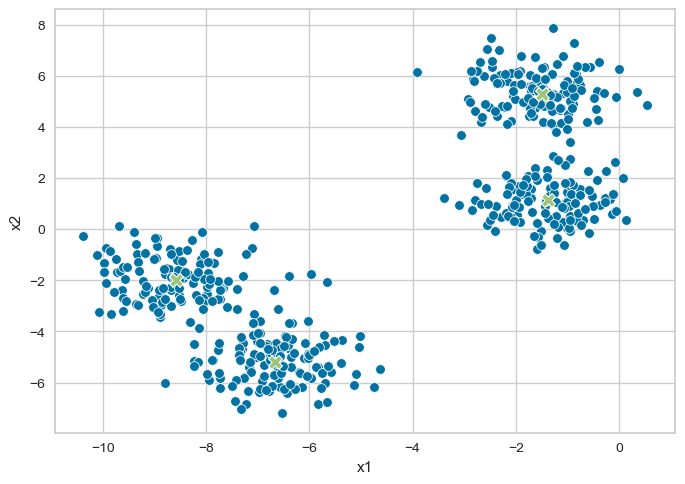

In [27]:
# Los puntos del conjunto de datos
sns.scatterplot(
    data = df,
    x = "x1",
    y = "x2"
)
# Centroides iniciales
sns.scatterplot(
    data = dfCentroids,
    x = "x1",
    y = "x2",
    marker = "X",
    s = 100
)
plt.show()

#### Aplicando Herarchical Clustering

Creamos el dendograma.

In [28]:
plt.figure(figsize = (10, 10))
# Creamos el dendograma con el método de ward linkage
dendogramPlot = dendrogram(linkage(X, method = "ward"))
plt.title("Dendograma usando ward linkage")
plt.xlabel("Cluster")
plt.ylabel("Distancia Euclidiana")
plt.show()

Vemos que una buena forma de separar los datos es utilizando 4 clusters. Teniendo esta información puedo aplicar el algoritmo.

Creamos el modelo, lo entrenamos, hacemos las predicciones y las guardamos al igual que los centroides.

In [29]:
# Creamos el modelo con 4 clusters; distancia euclidiana; ward linkage
hc = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward")
# Entrenamos el modelo y hacemos la clusterización y los guardamos en un df
predictions = hc.fit_predict(X)
# Añadimos una columna al conjunto de datos para especificar a qué cluster pertenece en base a la predicción
df["Cluster"] = predictions

Graficamos.

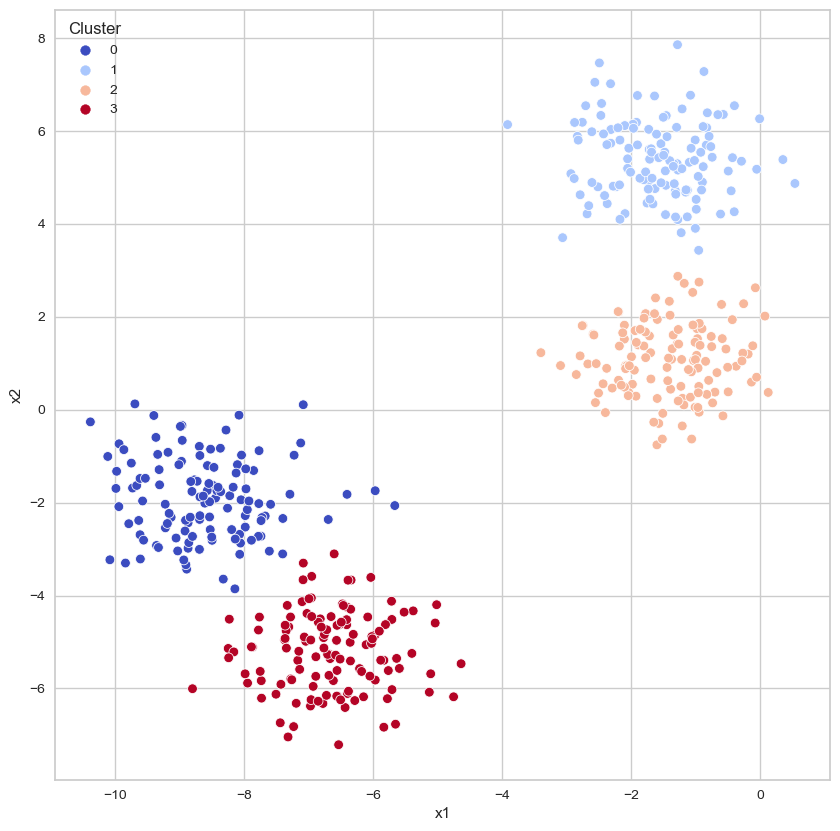

In [30]:
plt.figure(figsize = (10, 10))
# Datos
sns.scatterplot(
    data = df,
    x = "x1",
    y = "x2",
    hue = "Cluster",
    palette = "coolwarm"
)
plt.show()

#### Evaluando el modelo

Utilizaremos el coeficiente de silueta para evaluar el modelo.

In [31]:
silhouette_score(X, predictions)

0.6455378816365905

Vemos que para 4 clusters obtuvimos un coeficiente de silueta de aproximadamente 0.68; ahora queremos generar la gráfica de los coeficientes de silueta pero hay un problema ya que la librería utilizada con el método de K-Means necesita los centroides y en el clustering jerárquico no contamos con centroides. Afortunadamente Sklearn oficialmente tiene un código para esto.

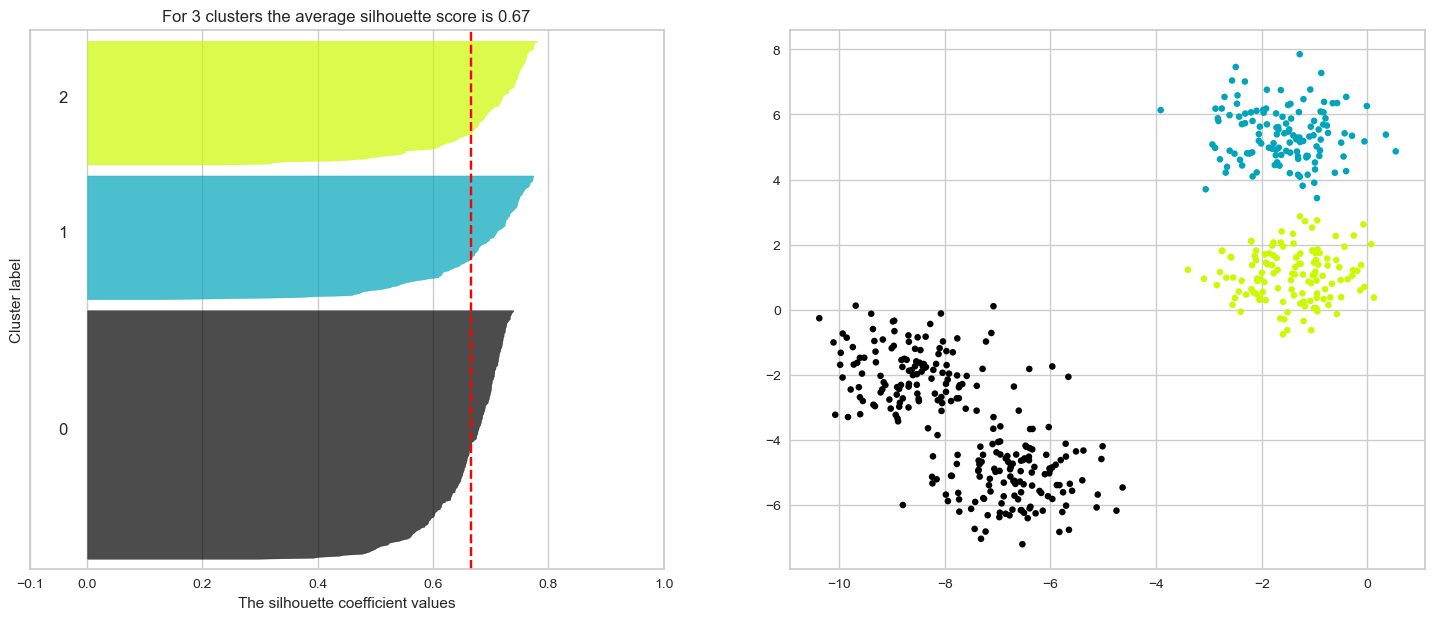

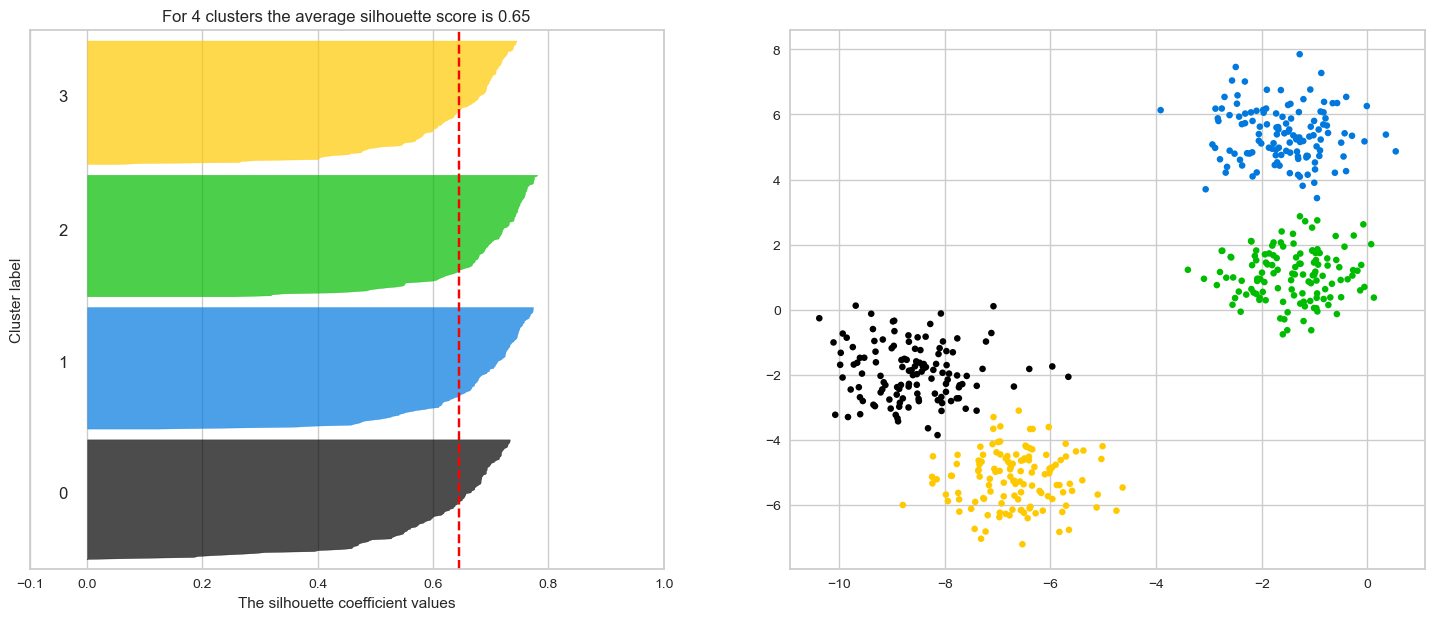

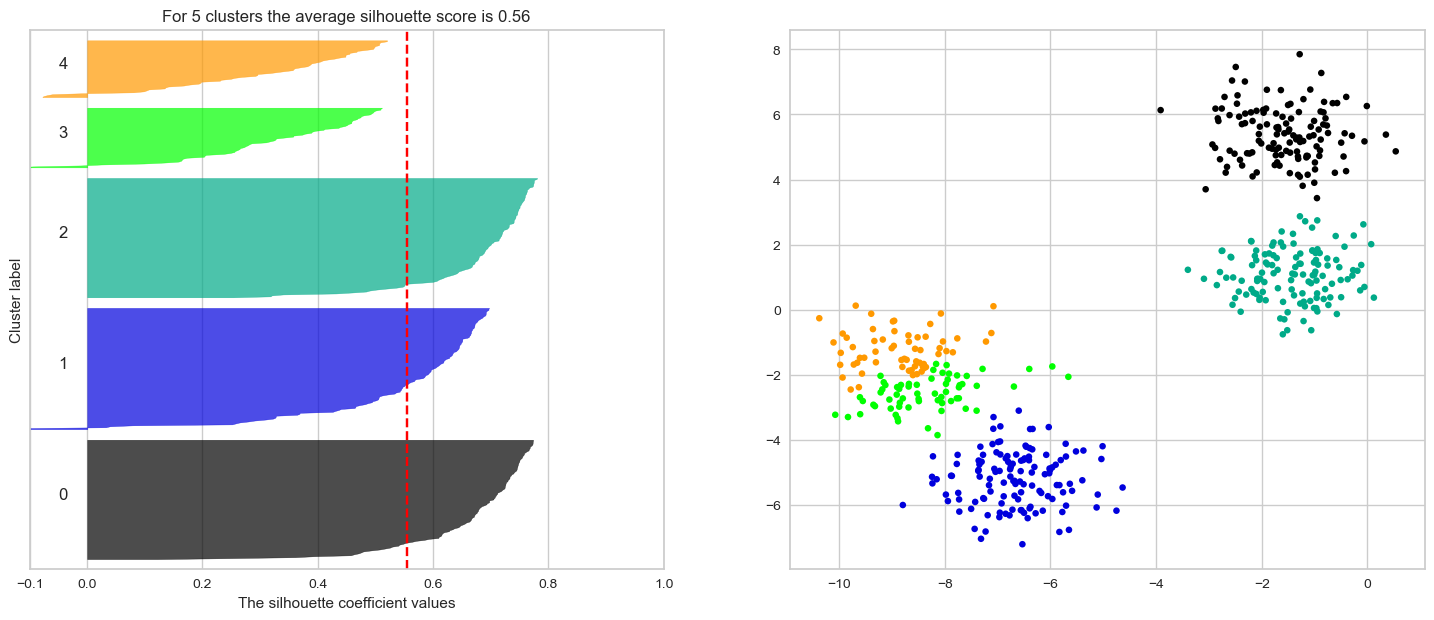

In [32]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"For {n_clusters} clusters the average silhouette score is {silhouette_avg.round(2)}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker = ".", s = 90, lw = 0, alpha = 1, c = colors, edgecolor = "k"
    )

    
plt.show()

De esta manera vemos que obtenemos el mejor resultado cuando tenemos 4 clusters con un coeficiente de silueta de aproximadamente 0.68

## DBSCAN Density-Based Spatial Clustering of Aplication with Noise

El algoritmo DBSCAN es clustering basado en la densidad y su principio es que un cluster (o la formación de un cluster) se debe dar cuando hay una gran aglomeración de puntos (densidad) mientras que el espacio que separa los clusters es cuando hay muy poca aglomeración de puntos (densidad).

La idea principal es que cada punto en el cluster de acuerdo a un radio dado debe tener un mínimo de vecinos o puntos cercanos para encontrar alta densidad; si tengo cierto número de vecinos o más es porque estoy en un cluster. Se requieren dos parámetros:
- **Épsilon**: es el radio de la vecindad.
- **minPoints**: cantidad mínima de puntos para considerar un cluster.

DBSCAN no necesita trabajar con formas esféricas y es capaz de reconocer distintos patrones. <br>
![](dbscan.PNG)

![](dbscan1.PNG)
![](dbscan2.PNG)

Hay 3 posibles opciones para los puntos:
- **Core point**: punto en el que en el vecindario se cumple con la cantidad de los puntos mínimos.
- **Border point**: punto que aunque no cumple con la cantidad mínima sí que tiene vecindad con algunos.
- **Noise point**: punto que no tiene ningún vecino alrededor.

![](dbscan3.PNG)

Cuando un core point conecta con otro core point se asume que son del mismo cluster y así se van sumando a un único cluster; luego se toma el cluster, se hace un vecindario y si conecta con un border point entonces este se agrega al cluster.

**Ventajas**
- No requiere especificar el número de clusters.
- Es capaz de detectar outliers y ruido.
- Puede contrar clusters en distintas formas no necesariamente esféricas.

**Desventajas**
- Los híper-parámetros (épsilon y minpoints) son muy determinantes; algunas combinaciones no funcionan igual para todos los grupos con distintas densidades.
- Los puntos fronterizos a los que se puede acceder desde más de un cluster pueden formar parte de cualquier cluster.

**Cuándo utilizar DBSCAN**
- Se desconoce la cantidad de clusters.
- No se usan formas esféricas.
- Hay densidades similares entre los clusters.

### Implementando DBSCAN

#### Librerías

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from itertools import product

#### Cargando los datos

Vamos a generar los datos utilizando *make_blobs*.

In [34]:
# 500 datos; std de los clusters de 0.8, 4 clusters; 2 características; retornar los Centroides
X, y, centroids = make_blobs(n_samples = 500, cluster_std = 0.8, centers = 4, n_features = 2, return_centers = True)

Creamos los conjuntos de datos.

In [35]:
# Datos
dfBlobs = pd.DataFrame({
    "x1" : X[:, 0],
    "x2" : X[:, 1],
    "y" : y
})

# Centroides
dfCentroids = pd.DataFrame({
    "x1" : centroids[:, 0],
    "x2" : centroids[:, 1]
})
dfBlobs.head()

x1        x2  y
0  4.134518  4.363404  1
1  2.963680  3.882505  1
2  5.280874  0.249347  0
3  3.904372  0.947787  0
4  6.850632  5.112379  3

También utilizaremos el dataset *make_moons* para generar un dataframe con datos con forma de luna.

In [36]:
# 250 observaciones; ruido de 0.05
Xm, ym = make_moons(n_samples = 250, noise = 0.05, random_state = 42)
# Dataframe
dfMoons = pd.DataFrame({
    "x1" : Xm[:, 0],
    "x2" : Xm[:, 1],
    "y" : ym
})
dfMoons.head()

x1        x2  y
0  0.084154  0.113341  1
1  1.050915  0.154710  0
2 -0.716555  0.675608  0
3  0.060932  0.926542  0
4 -1.005525  0.336425  0

#### Visualización de los datos

In [37]:
# Los puntos del conjunto de datos
sns.scatterplot(
    data = dfBlobs,
    x = "x1",
    y = "x2"
)
# Centroides iniciales
sns.scatterplot(
    data = dfCentroids,
    x = "x1",
    y = "x2",
    marker = "X",
    s = 100
)
plt.show()

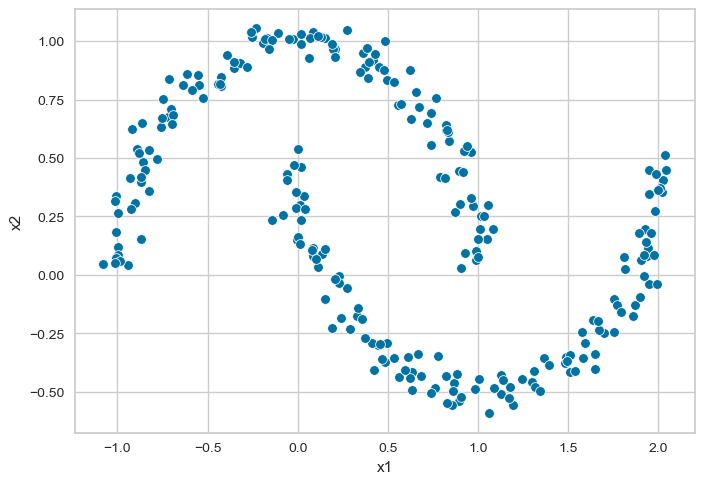

In [38]:
sns.scatterplot(
    data = dfMoons,
    x = "x1",
    y = "x2"
)
plt.show()

Para el caso de las lunas estamos de acuerdo en que aplicar K-Means no es buena idea ya que no son formas esféricas

#### Aplicando DBSCAN

Creamos el modelo y lo entrenamos para el caso del dataset con forma de luna.

In [39]:
# Creamos el modelo con epsilon 0.3 y 3 minpoints
dbscan = DBSCAN(eps = 0.3, min_samples = 3)
# Entrenamos el modelo y hacemos unas predicciones
ymPredictions = dbscan.fit_predict(Xm)
# Creamos una variable en el df para el cluster predicho
dfMoons["Cluster"] = ymPredictions

Graficamos.

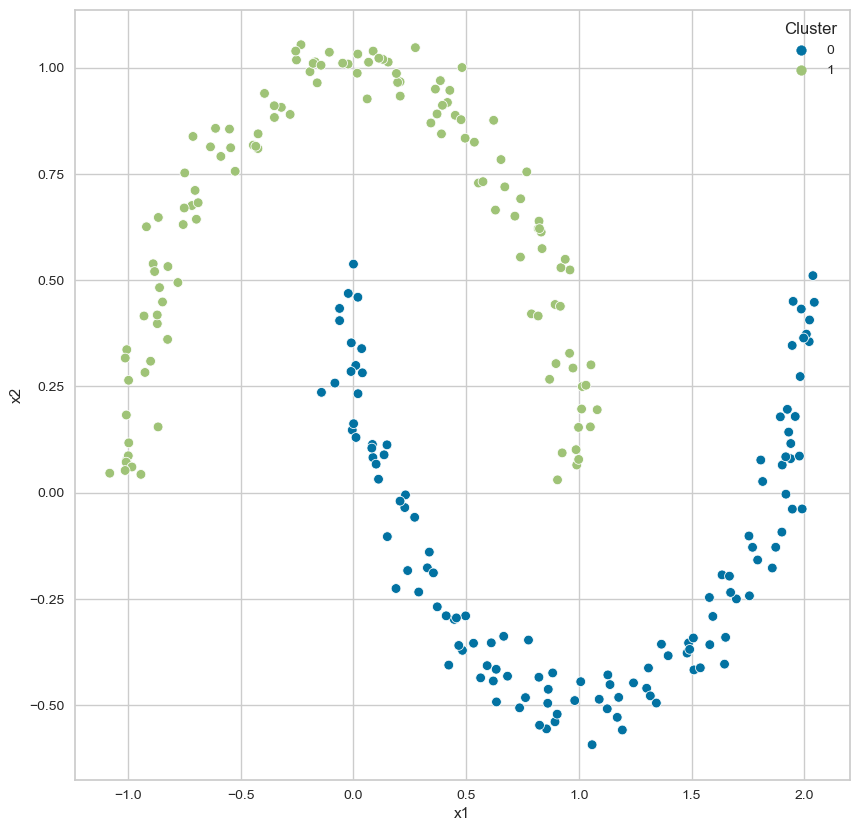

In [40]:
plt.figure(figsize = (10, 10))
sns.scatterplot(
    data = dfMoons,
    x = "x1",
    y = "x2",
    hue = "Cluster"
)
plt.show()

Vemos que DBSCAN pudo hacer una clusterización de los datos con forma de luna a la perfección. Ahora vamos a utilizar los datos con forma esférica.

In [41]:
# Creamos el modelo con epsilon 0.5 y 4 minpoints
dbscan = DBSCAN(eps = 0.7, min_samples = 4)
# Entrenamos el modelo y hacemos unas predicciones
yPredictions = dbscan.fit_predict(X)
# Creamos una variable en el df para el cluster predicho
dfBlobs["Cluster"] = yPredictions

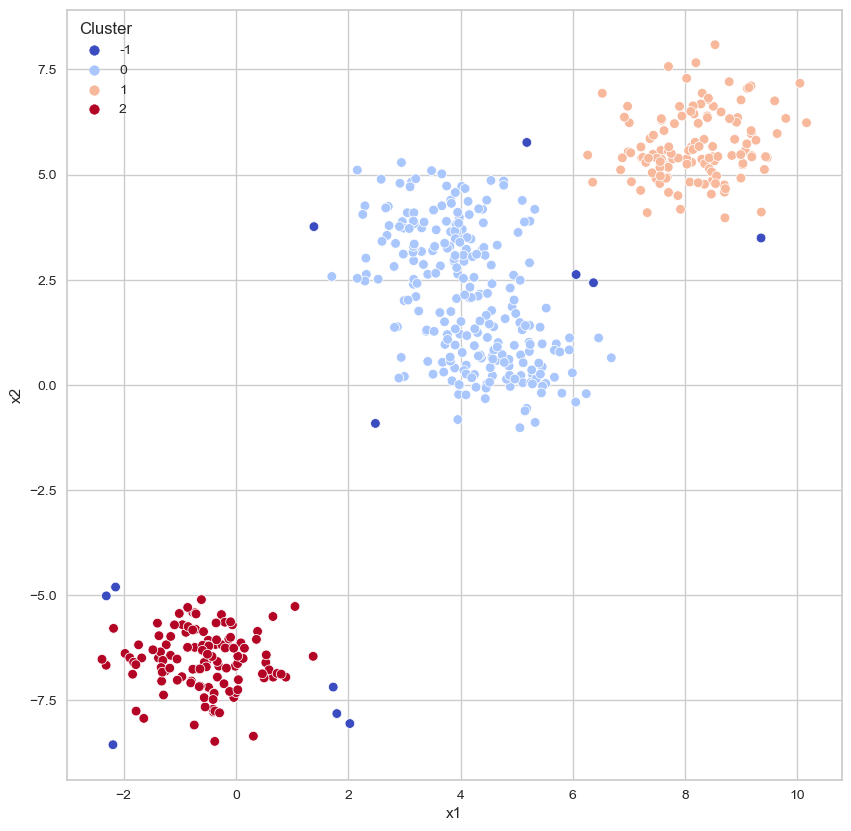

In [42]:
plt.figure(figsize = (10, 10))
# Datos
sns.scatterplot(
    data = dfBlobs,
    x = "x1",
    y = "x2",
    hue = "Cluster",
    palette = "coolwarm"
)
plt.show()


Vemos que también logra hacer un buen clustering pero es necesario una buena selección de los híper-parámetros.

#### Encontrar los híper-parámetros

El algoritmo de DBSCAN es muy sensible en sus híper-parámetros así que es fundamental encontrar los más óptimos.

Utilizaremos *NearestNeighbors* para encontrar los vecinos más cercanos a cada punto para medir las distancias.

In [43]:
# n_neighbors es el número de vecinos y normalmente se toman las dimensiones o features y se las multiplica por 2
neighbors = NearestNeighbors(n_neighbors = 4)
# Entrenamos el algoritmo
neighborsFit = neighbors.fit(X)
# Obtenemos las distancias 
distances, index = neighborsFit.kneighbors(X)

Ya tenemos las distancias de los 4 vecinos más cercanos a cada punto, ahora graficaremos.

In [44]:
# Ordenamos las distancias por filas
distances = np.sort(distances, axis = 0)
# Nos quedamos con los más cercanos
distances = distances[:, 1]

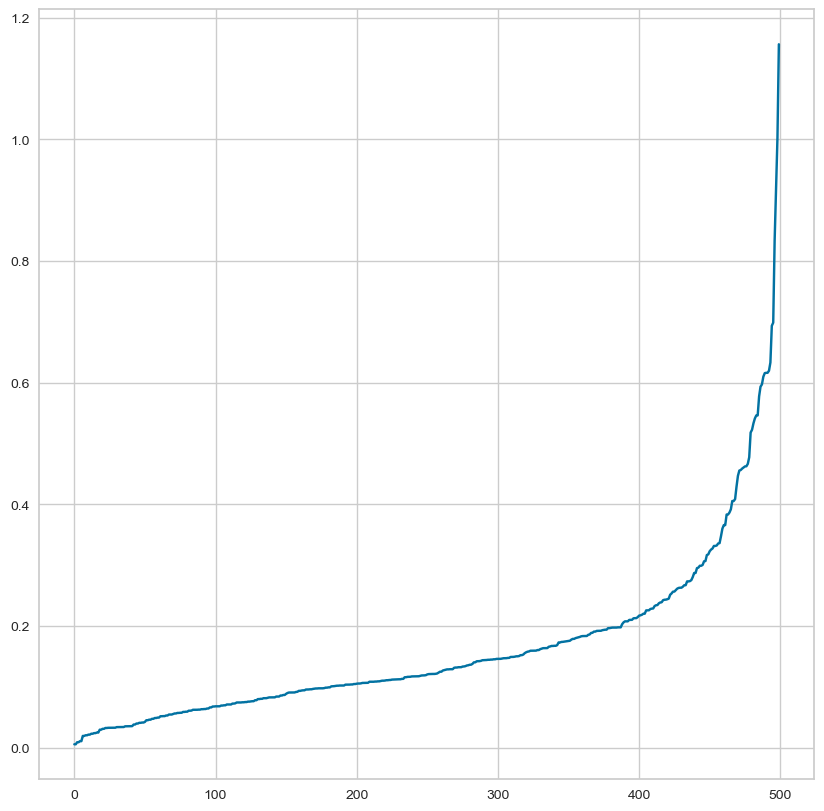

In [45]:
plt.figure(figsize = (10, 10))
plt.plot(distances)
plt.show()

Lo que buscamos es algo similiar a la metodología del codo, pero en este caso es de la rodilla ya que buscamos ese intervalo donde comienza a crecer como vemos en este caso desde 0.2 hasta 0.5; con esto pasamos a iterar con diferentes valores de épsilon y el número de minpoints.

In [46]:
# Lista de epsilons
epsilons = np.arange(0.25, 0.8, 0.05)
# Lista de minpoints
minPoints = np.arange(2, 11)

Nos apoyamos de la libería *itertools* y la clase product para crear una lista de todas las combinaciones entre epsilons y minpoints para luego iterar sobre ellos.

In [47]:
# Parámetros para el DBSCAN
paramns = list(product(epsilons, minPoints))
# Para guardar los coeficientes de silueta
silhouetteScores = []

# Iteramos
for paramn in paramns:
    # Creamos el modelo, lo entrenamos y hacemos las predicciones
    predictions = DBSCAN(eps = paramn[0], min_samples = paramn[1]).fit_predict(X)
    # Agregamos a la lista el coeficiente de silueta
    silhouetteScores.append(silhouette_score(X, predictions))

Vamos a graficar los coeficientes de silueta.

In [48]:
# Creamos un df a partir de los parámetros
dfParamns = pd.DataFrame.from_records(paramns, columns = ["Epsilon", "MinPoints"])
# Agregamos el coeficiente de silueta
dfParamns["silScore"] = silhouetteScores
# Ahora necesiamos convertir esto a una estructura matricial para un mapa de calor y para ello utilizamos pivot
# Pivoteamos el df de los parámetros; los valores serán el coeficiente de silueta; el índice MinPoints y la columna Epsilon
pivotParamns = pd.pivot_table(dfParamns, values = "silScore", index = "MinPoints", columns = "Epsilon")

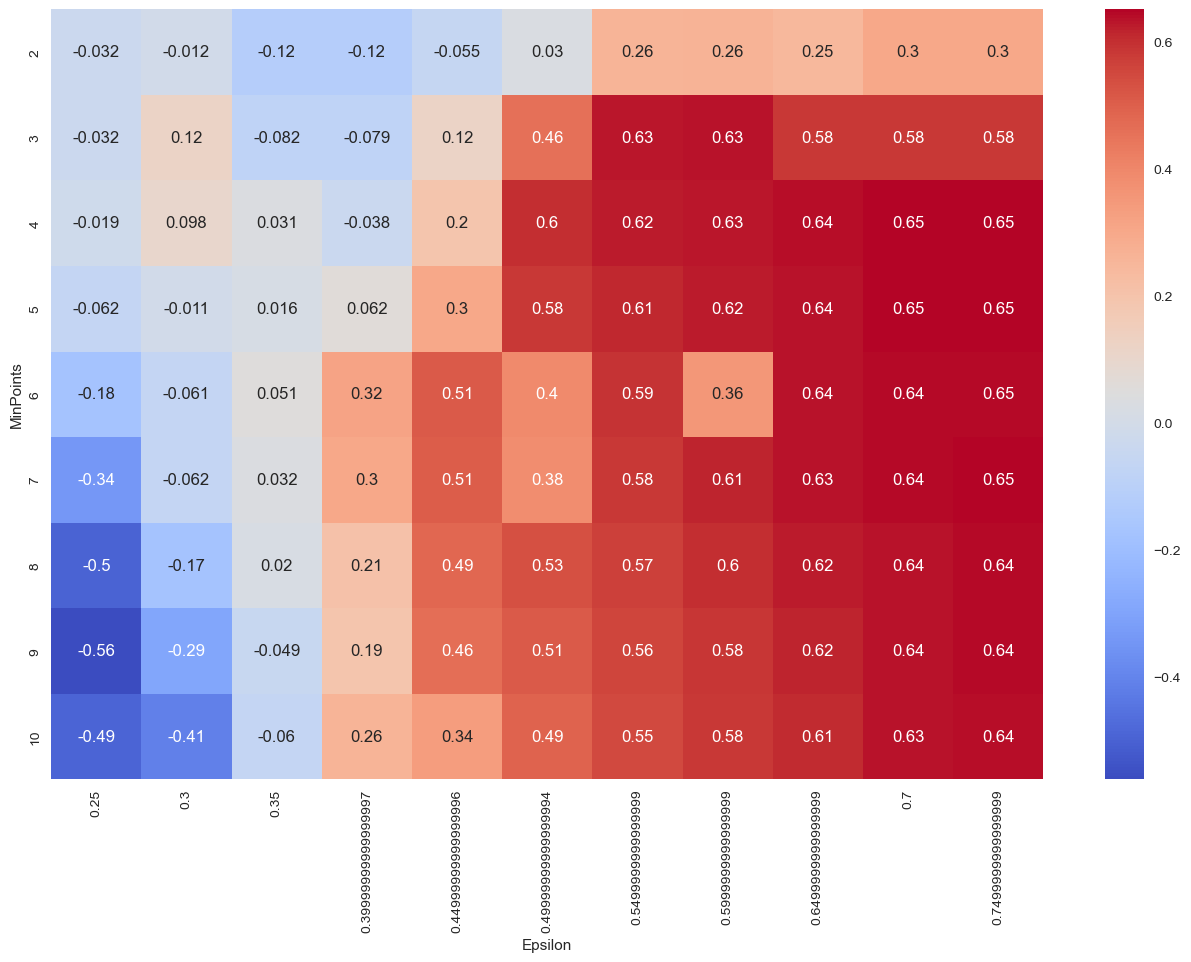

In [49]:
plt.figure(figsize = (16, 10))
sns.heatmap(
    pivotParamns,
    annot = True,
    cmap = "coolwarm"
)
plt.show()

De esta manera observamos que epsilons de 0.65 y 0.7 son buenas opciones al igual que minpoints de 2, 3 y 4.

#### Evaluando el modelo

Tomaremos los parámetros que nos dieron mejores resultados para crear el nuevo modelo y luego lo evaluaremos con el coeficiente de silueta.

In [50]:
# Creamos el modelo con epsilon 0.5 y 3 minpoints
dbscan = DBSCAN(eps = 0.65, min_samples = 3)
# Entrenamos el modelo y hacemos unas predicciones
yPredictions = dbscan.fit_predict(X)
# Creamos una variable en el df para el cluster predicho
dfBlobs["Cluster"] = yPredictions

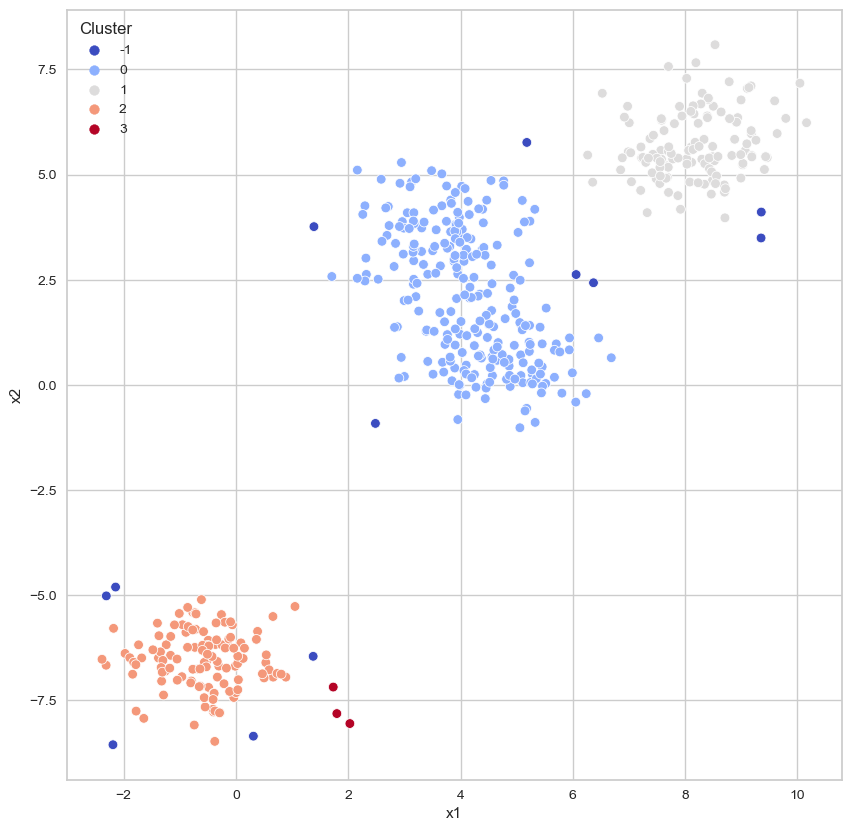

In [51]:
plt.figure(figsize = (10, 10))
sns.scatterplot(
    data = dfBlobs,
    x = "x1",
    y = "x2",
    hue = "Cluster",
    palette = "coolwarm"
)
plt.show()


Para visualizar el coeficiente de silueta utilizaremos el mismo código provisto por Sk-learn.

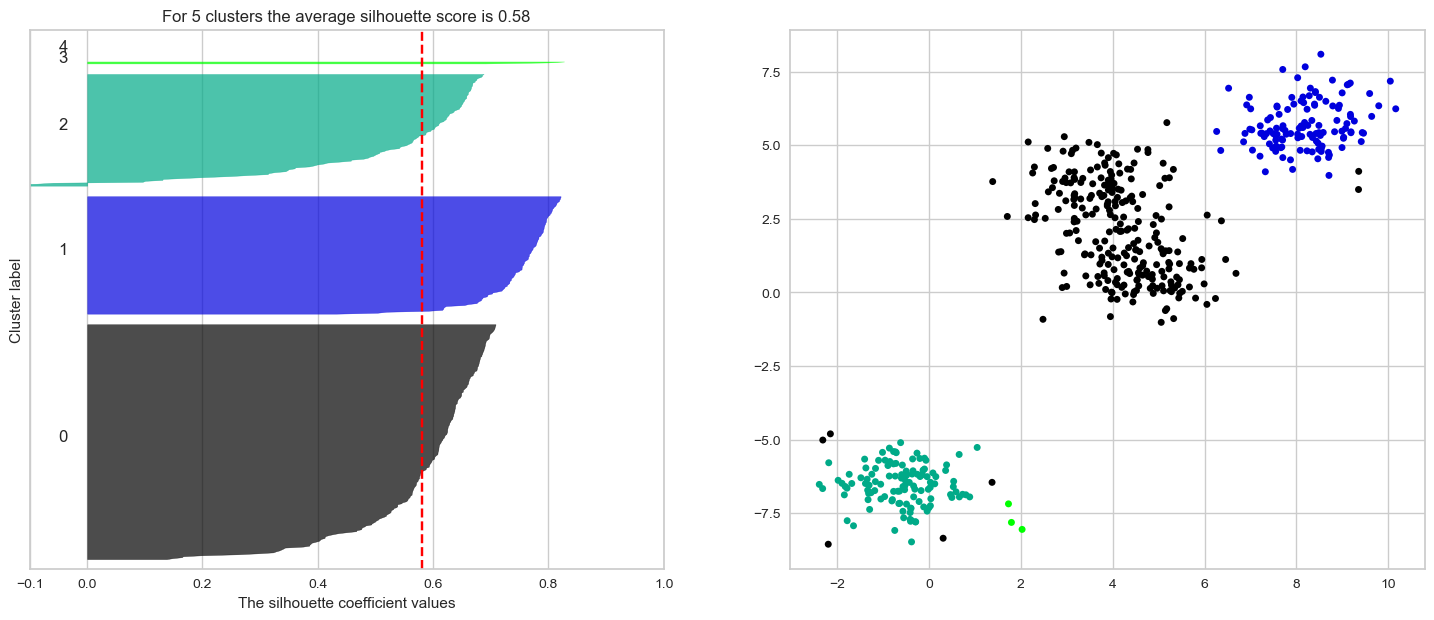

In [52]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = DBSCAN(eps = 0.65, min_samples = 3)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title(f"For {n_clusters} clusters the average silhouette score is {silhouette_avg.round(2)}")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker = ".", s = 100, lw = 0, alpha = 1, c = colors, edgecolor = "k"
)


plt.show()

Vemos que utilizando un épsilon de 0.65 y 3 minpoints obtenemos un coeficiente de silueta de 0.71

## Proyecto

Se hará un clustering de países utilizando factores socio-económicos y de salud que determinen el desarrollo general del país.

[Datos.](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)

### Librerías

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from itertools import product 

### Carga de datos

In [54]:
df = pd.read_csv("Country-data.csv")
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### Validación de los datos

In [55]:
df.shape

(167, 10)

Observamos que tenemos los datos de 167 países para 10 variables. Ahora miraremos el tipo de variables del dataset.

In [56]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

Observamos que todas las variables son cuantitativas a excepción del nombre del país.

### Manipulación y limpieza de los datos

Buscamos valores nulos.

In [57]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Vemos que no hay valores faltantes así que continuamos buscando valores duplicados.

In [58]:
df[df.duplicated()]

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []

Vemos que tampoco hay valores duplicados.

### Análisis de los datos

#### Distribución

Vamos a comenzar observando la distribución de los datos.

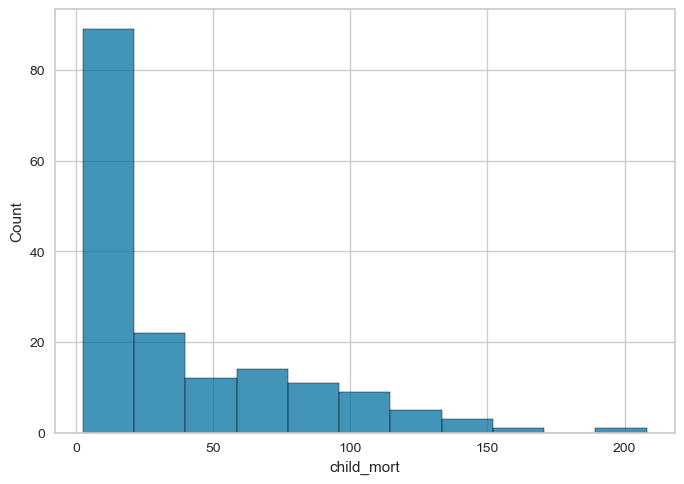

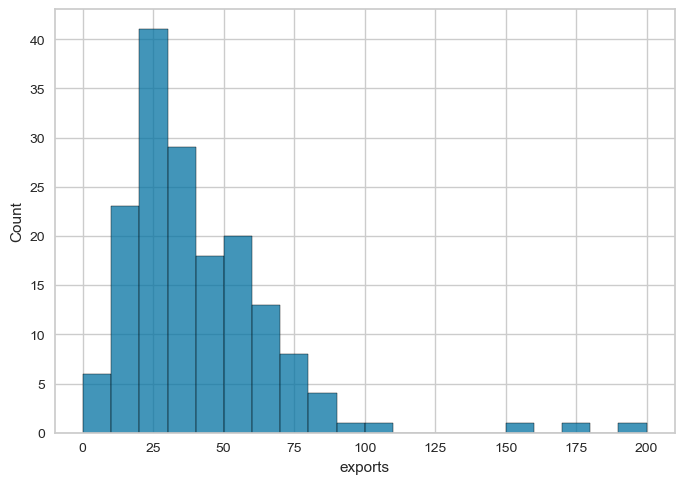

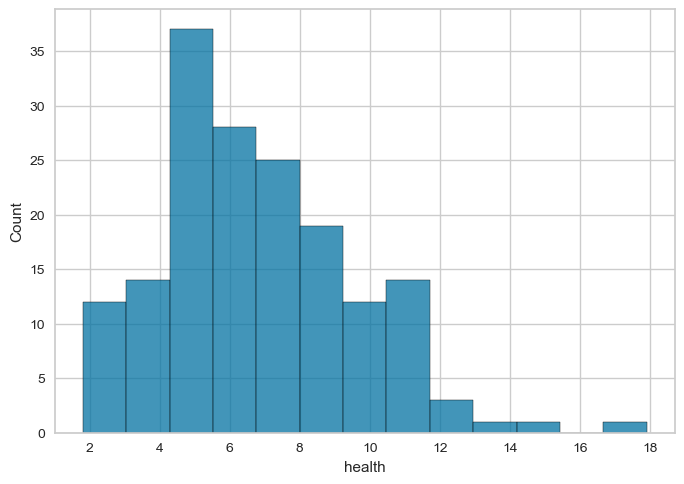

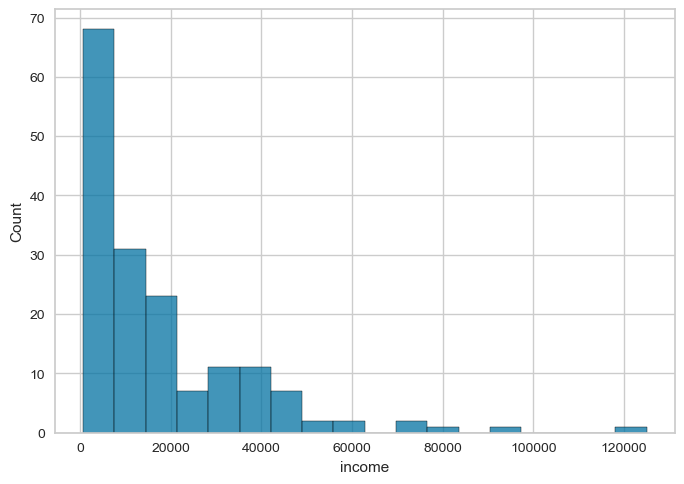

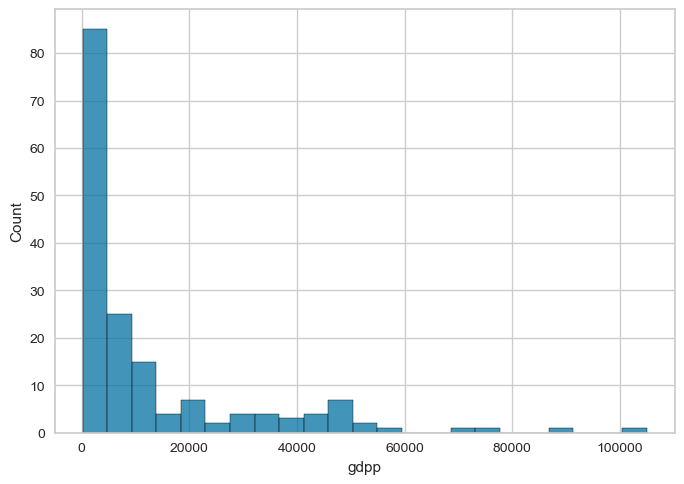

In [59]:
columns = df.select_dtypes(exclude = object).columns

for column in columns:
    sns.histplot(
        data = df,
        x = column
    )
    plt.show()    

Podemos observar varias cosas curiosas: hay países con una mortalidad infantil extremadamente alta; hay países con inflación negativa y otros que superan el 20% llegando a alcanzar más del 100%; hay países con esperanza de vida menor a 40 años; el GPPP en la mayoría de los países es inferior a 10000.

In [60]:
df.sort_values("inflation", ascending = False)

country  child_mort  exports  health  imports  income  \
113            Nigeria       130.0     25.3    5.07     17.4    5150   
163          Venezuela        17.1     28.5    4.91     17.6   16500   
103           Mongolia        26.1     46.7    5.44     56.7    7710   
149        Timor-Leste        62.6      2.2    9.12     27.8    1850   
49   Equatorial Guinea       111.0     85.8    4.48     58.9   33700   
..                 ...         ...      ...     ...      ...     ...   
135           Slovenia         3.2     64.3    9.41     62.9   28700   
43      Czech Republic         3.4     66.0    7.88     62.9   28300   
77               Japan         3.2     15.0    9.49     13.6   35800   
73             Ireland         4.2    103.0    9.19     86.5   45700   
131         Seychelles        14.4     93.8    3.40    108.0   20400   

     inflation  life_expec  total_fer   gdpp  
113    104.000        60.5       5.84   2330  
163     45.900        75.4       2.47  13500  
103     39.200        66.2       2.64   2650  
149     26.500        71.1       6.23   3600  
49      24.900        60.9       5.21  17100  
..         ...         ...        ...    ...  
135     -0.987        79.5       1.57  23400  
43      -1.430        77.5       1.51  19800  
77      -1.900        82.8       1.39  44500  
73      -3.220        80.4       2.05  48700  
131     -4.210        73.4       2.17  10800  

[167 rows x 10 columns]

Observamos que el país con más inflación en el dataset es Nigeria con un 104%, seguido de Venezuela con un 45.9%; por otro lado, los países con menos inflación son Seychelles e Irlanda con un -4.2% y -3.2% respectivamente.

In [61]:
df.sort_values("child_mort", ascending = False)

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
97                       Mali       137.0     22.8    4.98     35.1    1870   
..                        ...         ...      ...     ...      ...     ...   
53                    Finland         3.0     38.7    8.95     37.4   39800   
144                    Sweden         3.0     46.2    9.63     40.7   42900   
133                 Singapore         2.8    200.0    3.96    174.0   72100   
91                 Luxembourg         2.8    175.0    7.77    142.0   91700   
68                    Iceland         2.6     53.4    9.40     43.3   38800   

     inflation  life_expec  total_fer    gdpp  
66       5.450        32.1       3.33     662  
132     17.200        55.0       5.20     399  
32       6.390        56.5       6.59     897  
31       2.010        47.5       5.21     446  
97       4.370        59.5       6.55     708  
..         ...         ...        ...     ...  
53       0.351        80.0       1.87   46200  
144      0.991        81.5       1.98   52100  
133     -0.046        82.7       1.15   46600  
91       3.620        81.3       1.63  105000  
68       5.470        82.0       2.20   41900  

[167 rows x 10 columns]

In [62]:
df.sort_values("life_expec", ascending = True)

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
87                    Lesotho        99.7     39.4   11.10    101.0    2380   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
166                    Zambia        83.1     37.0    5.89     30.9    3280   
94                     Malawi        90.5     22.8    6.59     34.9    1030   
..                        ...         ...      ...     ...      ...     ...   
68                    Iceland         2.6     53.4    9.40     43.3   38800   
7                   Australia         4.8     19.8    8.73     20.9   41400   
145               Switzerland         4.5     64.0   11.50     53.3   55500   
133                 Singapore         2.8    200.0    3.96    174.0   72100   
77                      Japan         3.2     15.0    9.49     13.6   35800   

     inflation  life_expec  total_fer   gdpp  
66       5.450        32.1       3.33    662  
87       4.150        46.5       3.30   1170  
31       2.010        47.5       5.21    446  
166     14.000        52.0       5.40   1460  
94      12.100        53.1       5.31    459  
..         ...         ...        ...    ...  
68       5.470        82.0       2.20  41900  
7        1.160        82.0       1.93  51900  
145      0.317        82.2       1.52  74600  
133     -0.046        82.7       1.15  46600  
77      -1.900        82.8       1.39  44500  

[167 rows x 10 columns]

Podemos observar algo interesante y es que los países con alta mortalidad infantil suelen tener una menor esperanza de vida el cual es el caso de Haití que tiene una mortalidad infantil del 208% y una esperanza de vida de solo 32 años.

In [63]:
(df.gdpp[df.gdpp <= 10000].count() / df.gdpp.count()) * 100

65.86826347305389

Vemos que el 65.8% de los países tienen un GDPP menor o igual a 10000

Ahora utilizaremos boxplots para observar la distribución de los datos y si existen outliers.

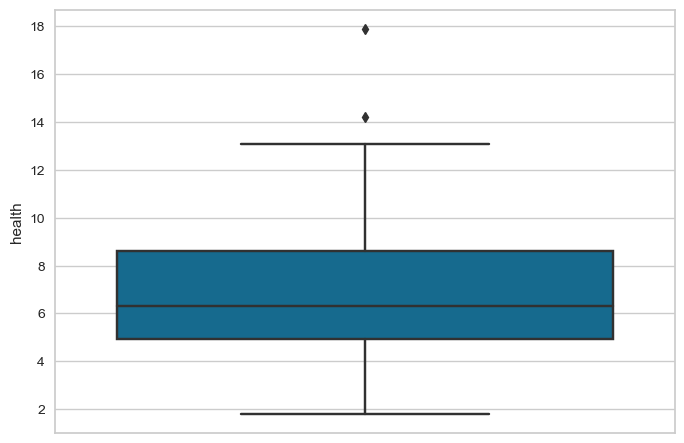

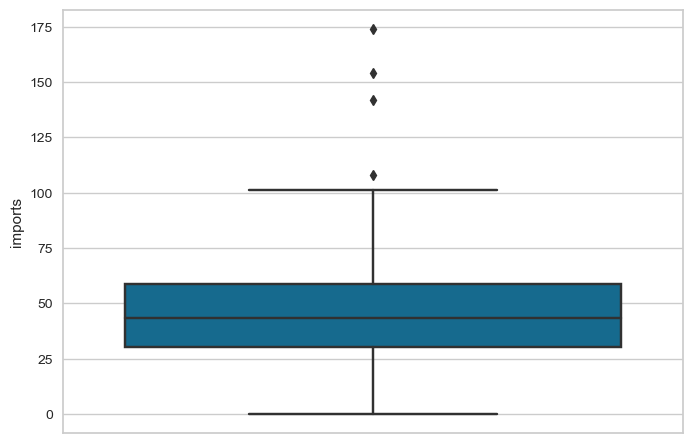

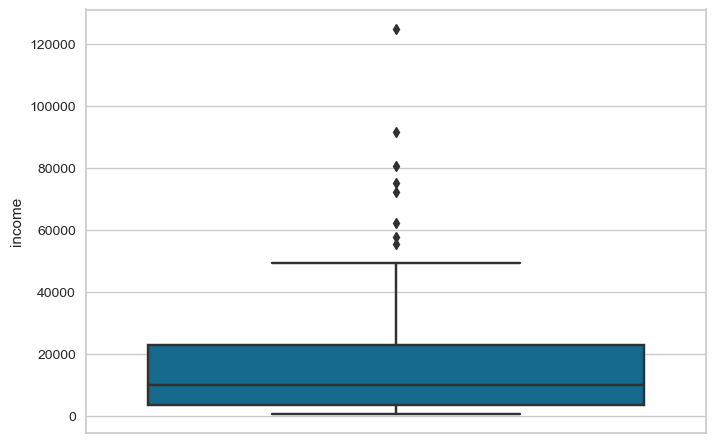

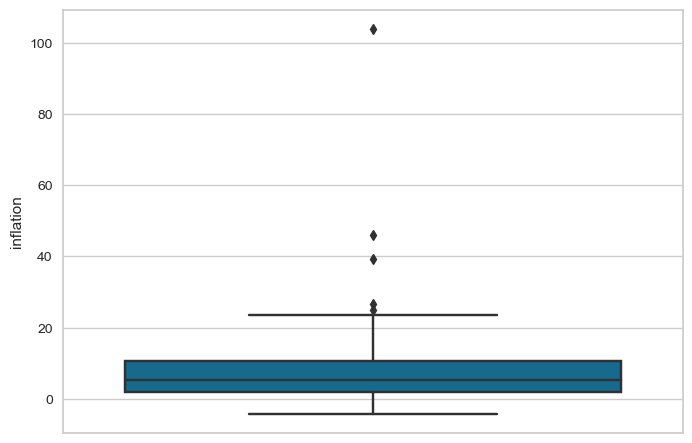

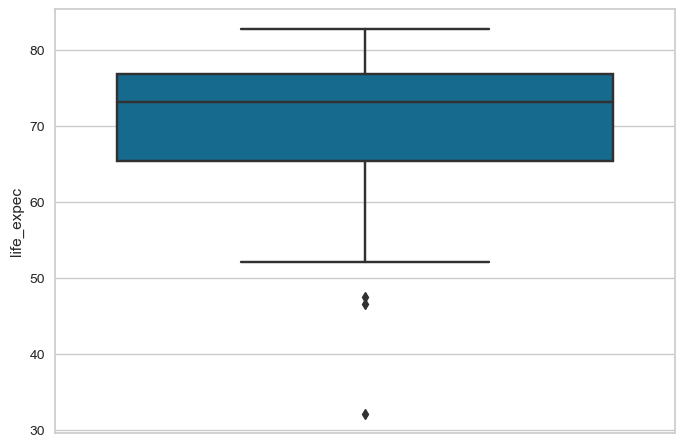

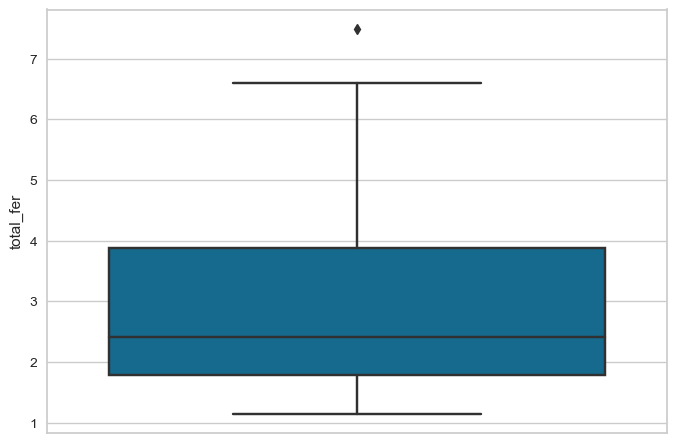

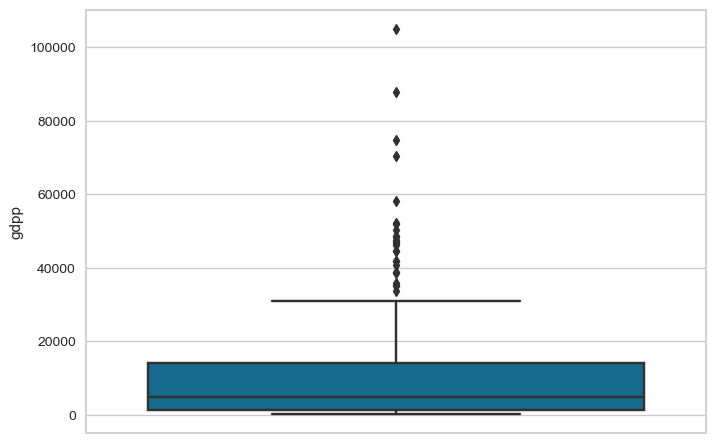

In [64]:
columns = df.select_dtypes(exclude = object).columns

for column in columns:
    sns.boxplot(
        data = df,
        y = column
        
    )
    plt.show()    

Con los boxplots queda más claro lo antes mencionado con respecto a países que tienen esperanzas de vida muy cortas y altas tasas de mortalidad infantil; países que tienen un GDPP muy alto, que exportan e importan mucho. A pesar de tener outliers como es el caso de Nigeria respecto a la inflación no es un error estadístico persé ya que ese datos hace parte o responde a la economía del país así que sería injusto separarlo.

#### Correlación

Ahora analizaremos la correlación entre las variables, comenzando con un pairplot.

In [65]:
sns.pairplot(
    data = df,
    height = 1.8
)
plt.show()

De este gráfico sacamos información importante como que a mayor experanza de vida mayor GDPP pero a su vez entre mayor fertilidad menor GDPP; parece haber una relación positiva entre la fertilidad y la mortalidad infantil; también parece haber cierta relación positiva entre las exportaciones y las importaciones; vemos una relación positiva entre los ingresos y el GDPP.

Finalmente, utilizaremos un mapa de calor.

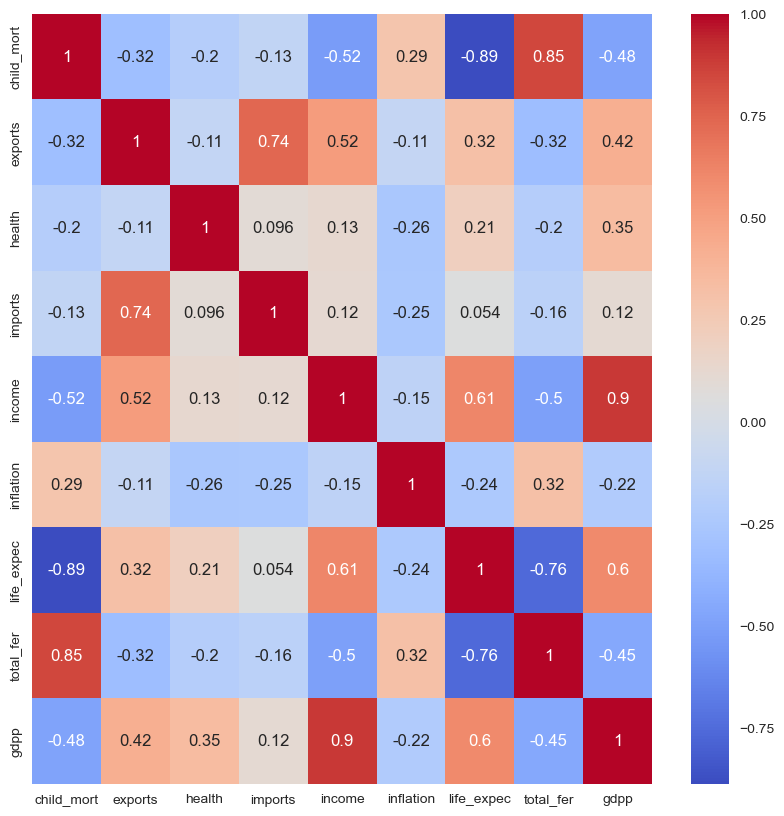

In [66]:
plt.figure(figsize = (10, 10))
sns.heatmap(
    data = df.corr(),
    annot = True,
    cmap = "coolwarm"
)
plt.show()

Confirmamos lo anterior y es que existe una correlación positiva entre la mortalidad infantil y la fertilidad; entre los ingresos y el GDPP; entre las exportaciones y las importaciones. También vemos una correlación negativa entre la esperanza de vida y la mortalidad infantil; la esperanza de vida y la fertilidad. 

Sí que hay correlación entre ciertas variables pero no hay suficiente para descargar alguna.

### Escalar los datos

Antes de comenzar a construir los modelos vamos a escalar los datos ya que como vimos hay valores que tienen una gran distancia entre sí (como la inflación de Nigeria).

In [67]:
# Creamos el escalador
scaler = StandardScaler()
# Escalamos los datos menos la columna del país; el resultado lo convertimos en un dataframe
dfScaled = pd.DataFrame(scaler.fit_transform(df.drop("country", axis = 1)), columns = columns)
dfScaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

### Aplicando PCA

El análisis de componentes principales hace que el clustering funcione mejor al reducir la dimensionalidad del conjunto de datos. 

In [68]:
# Creamos el modelo para PCA
pca = PCA()
# Entrenamos el modelo y transformamos los datos
scaledPCA = pca.fit_transform(dfScaled)

Ahora visualizamos la varianza capturada por las distintas variables.

In [69]:
var = pca.explained_variance_ratio_
var

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Podemos crear una gráfica para una mejor visualización.

[]

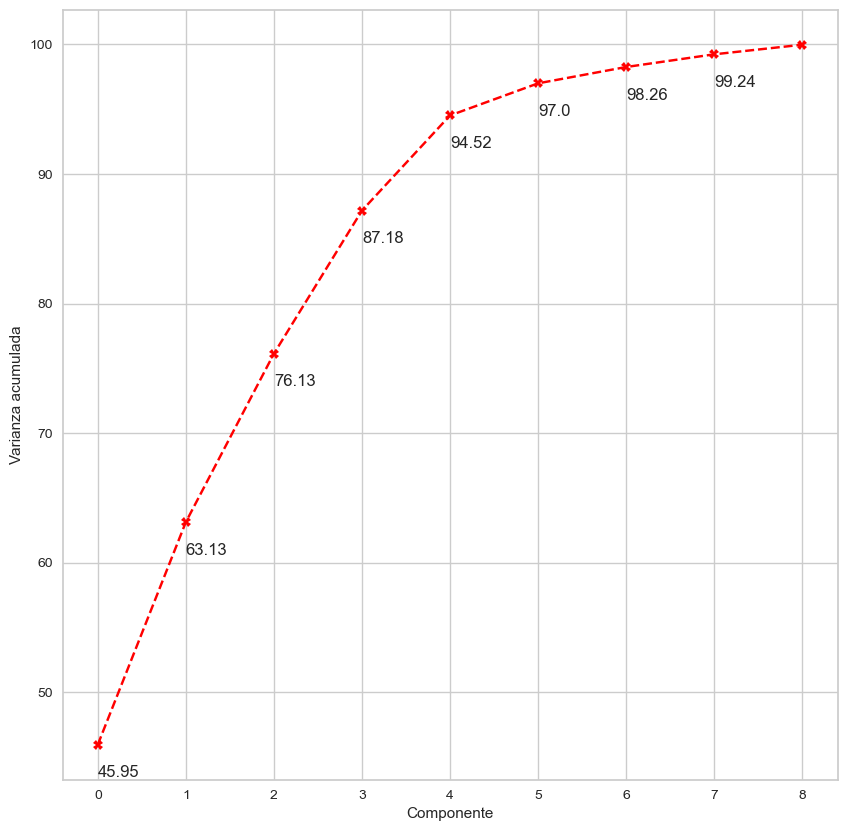

In [70]:
# Varianza acumulada
accVar = np.cumsum(np.round(var, decimals = 4) * 100)
# Lista para guardar el número del componente
components = np.arange(0, 8)

plt.figure(figsize = (10, 10))
# Iteramos a través de los componentes y su respectiva varianza acumulada
for component, aV in zip(components, accVar):
    plt.annotate(round(aV, 2), xy = (component, aV - 2.5))
    
plt.plot(accVar, color = "red", marker = "X", linestyle = "--")
plt.xlabel("Componente")
plt.ylabel("Varianza acumulada")
plt.plot()

Vemos que con los componentes 0, 1 , 2 y 3 ya abarcamos el 87.18% de la varianza así que trabajaremos con ellos.

In [71]:
# Creamos un df con los datos escalados y aplicado el PCA
dfScaledPCA = pd.DataFrame(scaledPCA)
# Eliminamos los componentes que no nos interesan
dfScaledPCA.drop([4, 5, 6, 7, 8], axis = 1, inplace = True)
dfScaledPCA.head()

0         1         2         3
0 -2.913025  0.095621 -0.718118  1.005255
1  0.429911 -0.588156 -0.333486 -1.161059
2 -0.285225 -0.455174  1.221505 -0.868115
3 -2.932423  1.695555  1.525044  0.839625
4  1.033576  0.136659 -0.225721 -0.847063

Con esto reducimos la dimensionalidad del dataset a solo 4 componentes que siguen abarcando una gran varianza y con esto ya podemos empezar a aplicar clustering.

### K-Means

#### Con PCA

Primero utilizaremos el método del codo para encontrar el número de clusters.

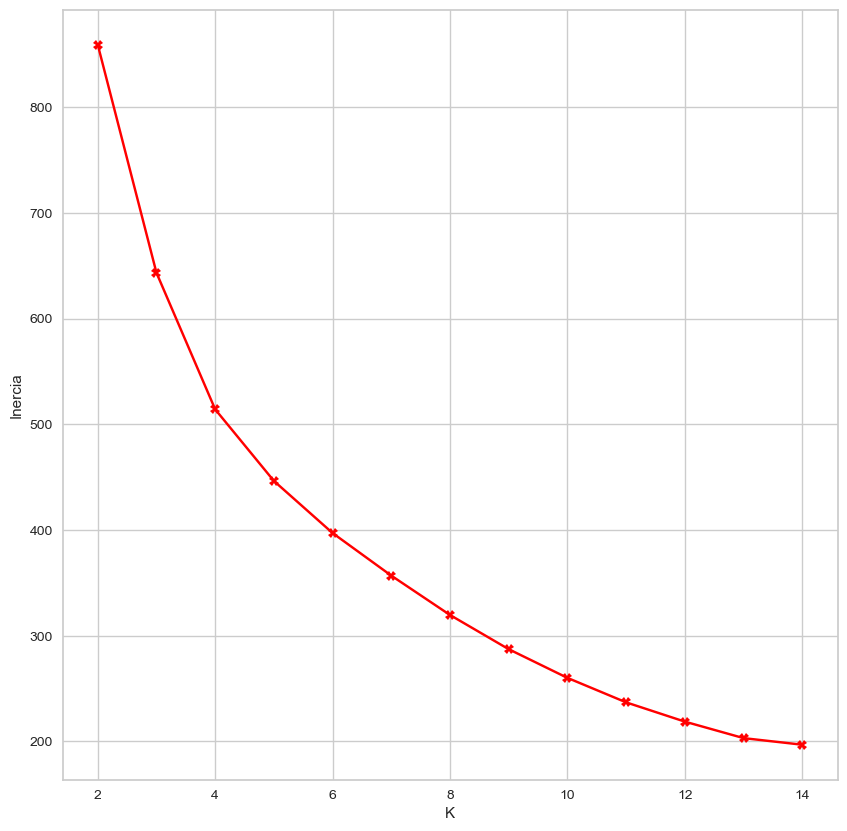

In [72]:
# Suma de los errores cuadráticos
SSE = []
# Coeficientes de silueta
silhouetteScores = []
# Posibles clusters
K = range(2, 15)
# Recorremos el rango de K
for k in K:
    # Creamos el modelo de K clusters
    kmeans = KMeans(n_clusters = k, max_iter = 100000)
    # Hacemos unas predicciones
    predictions = kmeans.fit_predict(dfScaledPCA)
    # Calculamos la inercia o suma de los errores cuadráticos y la agregamos a la lista
    SSE.append(kmeans.inertia_)
    # Calculamos el coeficiente de silueta y lo agregamos a la lista
    silhouetteScores.append(silhouette_score(dfScaledPCA, predictions))
    
# Hacemos el gráfico del método del codo
plt.figure(figsize = (10, 10))
plt.plot(K, SSE, color = "red", marker = "X")
plt.xlabel("K")
plt.ylabel("Inercia")
plt.show()

Ahora visualizamos cómo cambia el coeficiente de silueta.

In [73]:
plt.figure(figsize = (10, 10))
plt.plot(K, silhouetteScores, color = "red", marker = "X")
plt.xlabel("K")
plt.ylabel("Coeficiente de silueta")
plt.show()

Con esto encontramos que el número de clusters óptimo es 4; con esto entonces procedemos a construir y entrenar el modelo.

In [74]:
# Creamos el modelo con 4 clusters
kmeans = KMeans(n_clusters = 4, max_iter = 10000)
# Entrenamos el modelo y hacemos la clusterización y los guardamos en un df
clusters = kmeans.fit_predict(dfScaledPCA)
# Añadimos una columna al conjunto de datos para especificar a qué cluster pertenece en base a la predicción
df["KMeansPCA"] = clusters
silhouette_score(dfScaledPCA, clusters)

0.3522170843293593

Con PCA y K-Means obtuvimos un coeficiente de silueta de 0.35

#### Sin PCA

Ahora haremos el clustering con K-Means pero con el dataset sin haberle aplicado PCA.

Primero utilizaremos el método del codo para encontrar el número de clusters.

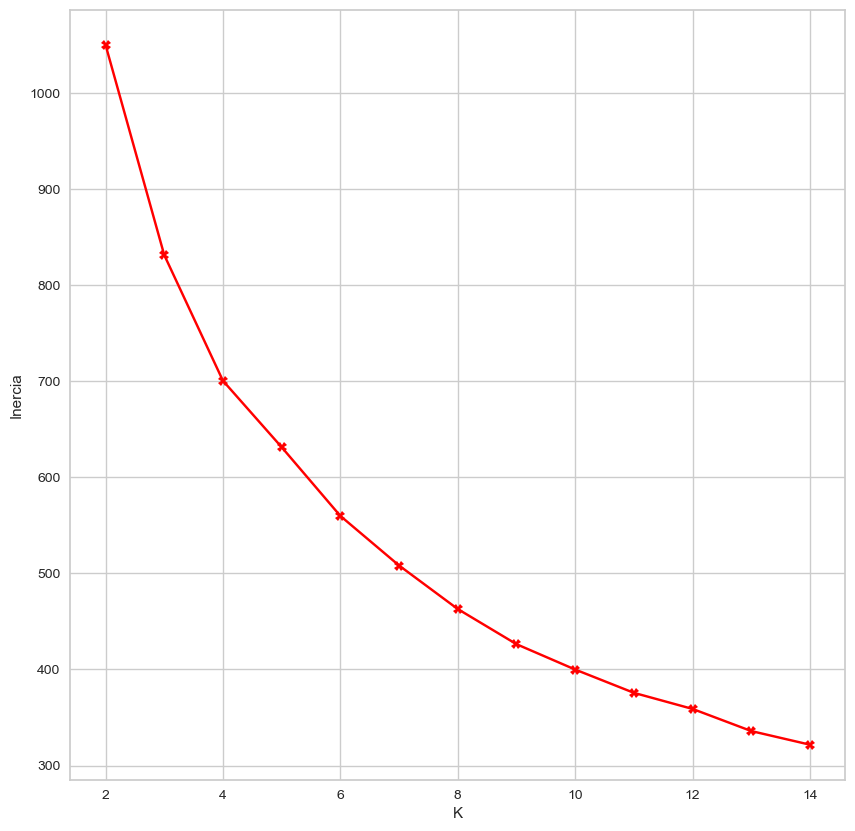

In [75]:
# Suma de los errores cuadráticos
SSE = []
# Coeficientes de silueta
silhouetteScores = []
# Posibles clusters
K = range(2, 15)
# Recorremos el rango de K
for k in K:
    # Creamos el modelo de K clusters
    kmeans = KMeans(n_clusters = k, max_iter = 100000)
    # Hacemos unas predicciones
    predictions = kmeans.fit_predict(dfScaled)
    # Calculamos la inercia o suma de los errores cuadráticos y la agregamos a la lista
    SSE.append(kmeans.inertia_)
    # Calculamos el coeficiente de silueta y lo agregamos a la lista
    silhouetteScores.append(silhouette_score(dfScaled, predictions))
    
# Hacemos el gráfico del método del codo
plt.figure(figsize = (10, 10))
plt.plot(K, SSE, color = "red", marker = "X")
plt.xlabel("K")
plt.ylabel("Inercia")
plt.show()

Ahora visualizamos cómo cambia el coeficiente de silueta.

In [76]:
plt.figure(figsize = (10, 10))
plt.plot(K, silhouetteScores, color = "red", marker = "X")
plt.xlabel("K")
plt.ylabel("Coeficiente de silueta")
plt.show()

Con esto encontramos que el número de clusters óptimo es 5; con esto entonces procedemos a construir y entrenar el modelo.

In [77]:
# Creamos el modelo con 5 clusters
kmeans = KMeans(n_clusters = 5, max_iter = 10000)
# Entrenamos el modelo y hacemos la clusterización y los guardamos en un df
clusters = kmeans.fit_predict(dfScaled)
# Añadimos una columna al conjunto de datos para especificar a qué cluster pertenece en base a la predicción
df["KMeansNoPCA"] = clusters
silhouette_score(dfScaled, clusters)

0.3056417339358457

Con K-Means pero sin PCA obtuvimos un coeficiente de silueta de 0.3

### Agglomerative Hierarchical Clustering

#### Con PCA

Primero creamos el dendograma para saber el número de clusters para construir el modelo.

In [78]:
plt.figure(figsize = (10, 10))
# Creamos el dendograma con el método de ward linkage
dendogramPlot = dendrogram(linkage(dfScaledPCA, method = "ward"))
plt.title("Dendograma usando ward linkage")
plt.xlabel("Cluster")
plt.ylabel("Distancia Euclidiana")
plt.show()

Vemos que una buena forma de separar los datos es utilizando 2 clusters. Teniendo esta información puedo aplicar el algoritmo.

Creamos el modelo, lo entrenamos, hacemos las predicciones y las guardamos al igual que los centroides.

In [79]:
# Creamos el modelo con 2 clusters; distancia euclidiana; ward linkage
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
# Entrenamos el modelo y hacemos la clusterización y los guardamos en un df
predictions = hc.fit_predict(dfScaledPCA)
# Añadimos una columna al conjunto de datos para especificar a qué cluster pertenece en base a la predicción
df["hcPCA"] = predictions
silhouette_score(dfScaledPCA, predictions)

0.3070110704080526

Con PCA y Hierarchical Clustering obtuvimos un coeficiente de silueta de 0.3

#### Sin PCA

Ahora haremos el clustering jerárquico pero utilizando el dataset que no tiene aplicado la reducción de dimensionalidad.

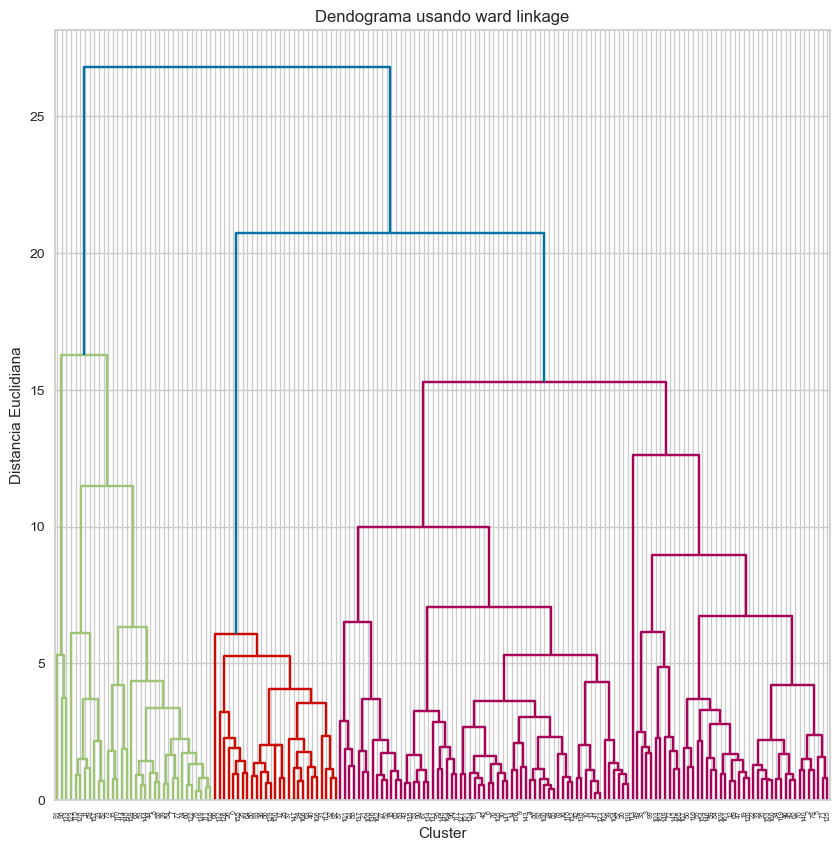

In [80]:
plt.figure(figsize = (10, 10))
# Creamos el dendograma con el método de ward linkage
dendogramPlot = dendrogram(linkage(dfScaled, method = "ward"))
plt.title("Dendograma usando ward linkage")
plt.xlabel("Cluster")
plt.ylabel("Distancia Euclidiana")
plt.show()

Vemos que una buena forma de separar los datos es utilizando 2 clusters. Teniendo esta información puedo aplicar el algoritmo.

Creamos el modelo, lo entrenamos, hacemos las predicciones y las guardamos al igual que los centroides.

In [81]:
# Creamos el modelo con 2 clusters; distancia euclidiana; ward linkage
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
# Entrenamos el modelo y hacemos la clusterización y los guardamos en un df
predictions = hc.fit_predict(dfScaled)
# Añadimos una columna al conjunto de datos para especificar a qué cluster pertenece en base a la predicción
df["hcNoPCA"] = predictions
silhouette_score(dfScaled, predictions)

0.3153134331018189

Con Hierarchical Clustering pero sin utilizar PCA obtuvimos un coeficiente de silueta de 0.31

### DBSCAN

#### Con PCA

El algoritmo de DBSCAN es muy sensible en sus híper-parámetros así que es fundamental encontrar los más óptimos.

Utilizaremos *NearestNeighbors* para encontrar los vecinos más cercanos a cada punto para medir las distancias.

In [102]:
# n_neighbors es el número de vecinos y normalmente se toman las dimensiones o features y se las multiplica por 2
neighbors = NearestNeighbors(n_neighbors = 4)
# Entrenamos el algoritmo
neighborsFit = neighbors.fit(dfScaledPCA)
# Obtenemos las distancias 
distances, index = neighborsFit.kneighbors(dfScaledPCA)

Ya tenemos las distancias de los 4 vecinos más cercanos a cada punto, ahora graficaremos.

In [103]:
# Ordenamos las distancias por filas
distances = np.sort(distances, axis = 0)
# Nos quedamos con los más cercanos
distances = distances[:, 1]

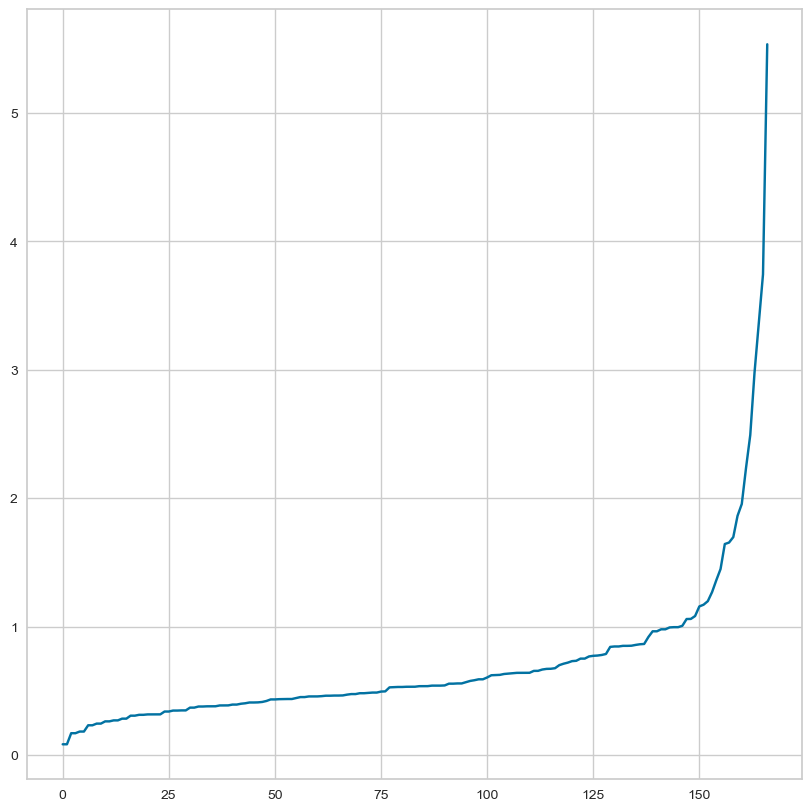

In [104]:
plt.figure(figsize = (10, 10))
plt.plot(distances)
plt.show()

Lo que buscamos es algo similiar a la metodología del codo, pero en este caso es de la rodilla ya que buscamos ese intervalo donde comienza a crecer como vemos en este caso desde 0.8 hasta 2; con esto pasamos a iterar con diferentes valores de épsilon y el número de minpoints.

In [105]:
# Lista de epsilons
epsilons = np.arange(1, 3.2, 0.1)
# Lista de minpoints
minPoints = np.arange(2, 14)

Nos apoyamos de la libería *itertools* y la clase product para crear una lista de todas las combinaciones entre epsilons y minpoints para luego iterar sobre ellos.

In [106]:
# Parámetros para el DBSCAN
paramns = list(product(epsilons, minPoints))
# Para guardar los coeficientes de silueta
silhouetteScores = []
# Para guardar el número de clusters
kClusters = []

# Iteramos
for paramn in paramns:
    # Creamos el modelo, lo entrenamos y hacemos las predicciones
    predictions = DBSCAN(eps = paramn[0], min_samples = paramn[1]).fit_predict(dfScaledPCA)
    try:
        # Agregamos a la lista el coeficiente de silueta
        silhouetteScores.append(silhouette_score(dfScaledPCA, predictions))
    except:
        silhouetteScores.append(0)
    kClusters.append(len(np.unique(predictions)))
    

Vamos a graficar los coeficientes de silueta.

In [107]:
# Creamos un df a partir de los parámetros
dfParamns = pd.DataFrame.from_records(paramns, columns = ["Epsilon", "MinPoints"])
# Agregamos el coeficiente de silueta
dfParamns["silScore"] = silhouetteScores
# Agregamos el número de clusters
dfParamns["KClusters"] = kClusters
# Ahora necesiamos convertir esto a una estructura matricial para un mapa de calor y para ello utilizamos pivot
# Pivoteamos el df de los parámetros; los valores serán el coeficiente de silueta; el índice MinPoints y la columna Epsilon
pivotParamns = pd.pivot_table(dfParamns, values = "silScore", index = "MinPoints", columns = "Epsilon")

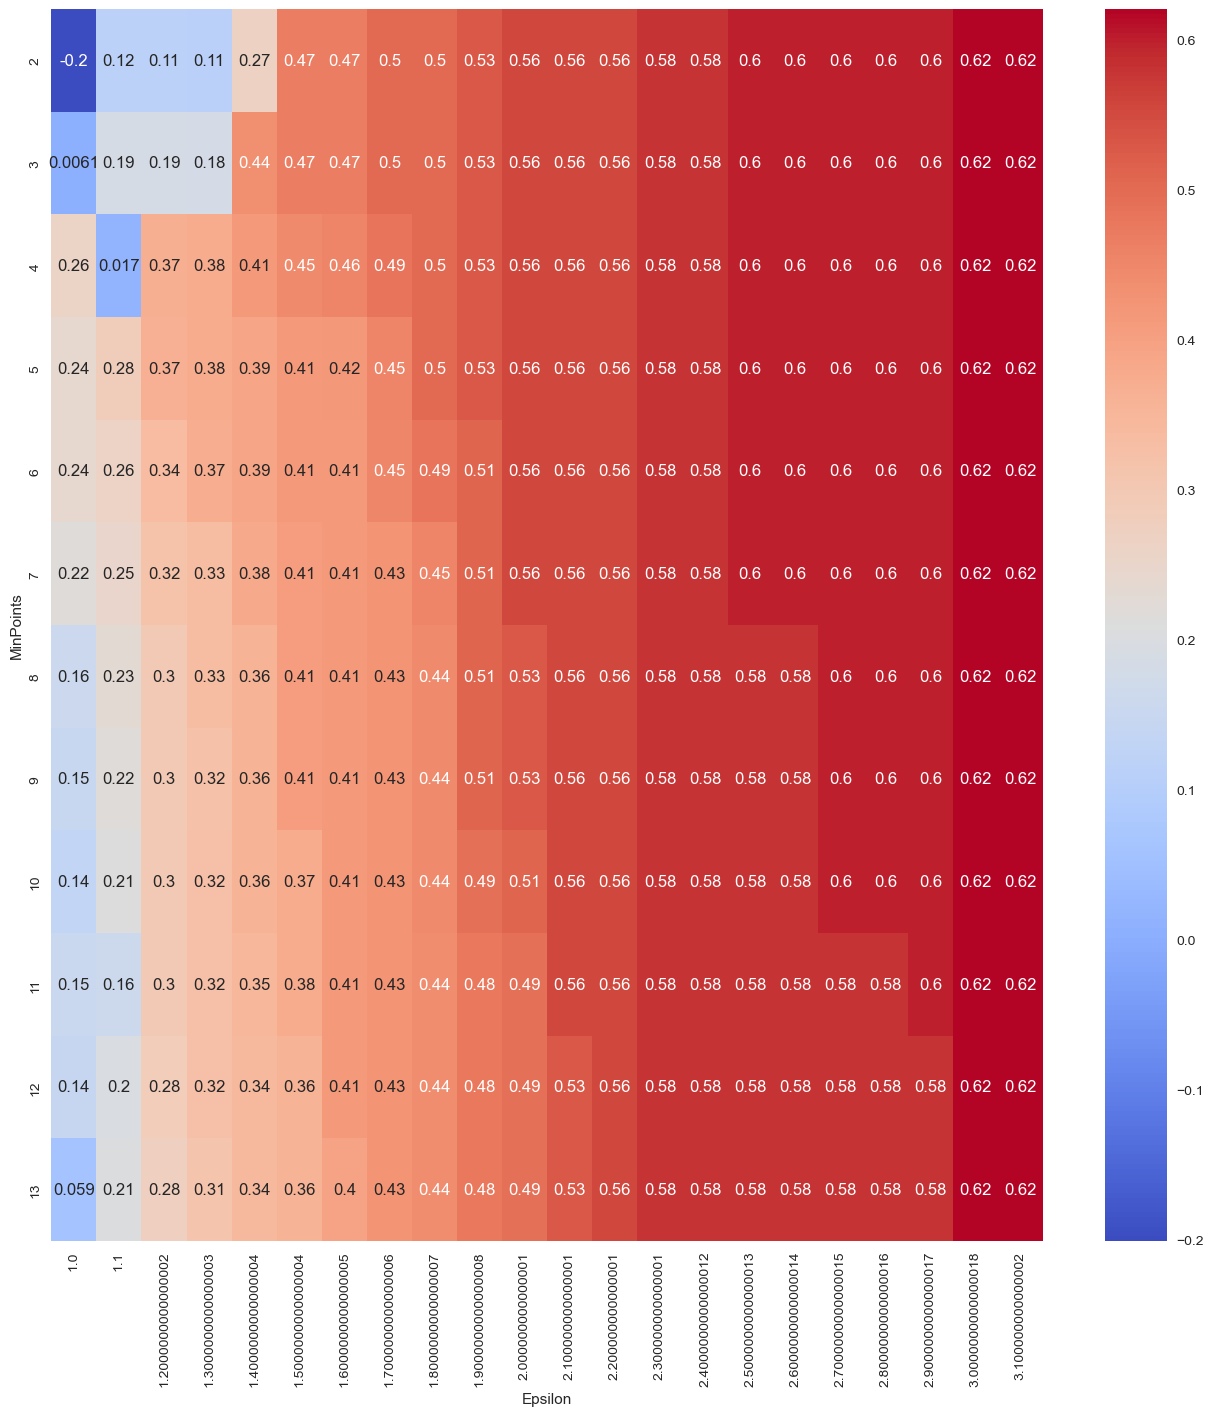

In [108]:
plt.figure(figsize = (16, 16))
sns.heatmap(
    pivotParamns,
    annot = True,
    cmap = "coolwarm"
)
plt.show()

Ahora haremos la misma gráfica pero los valores serán el número de clusters.

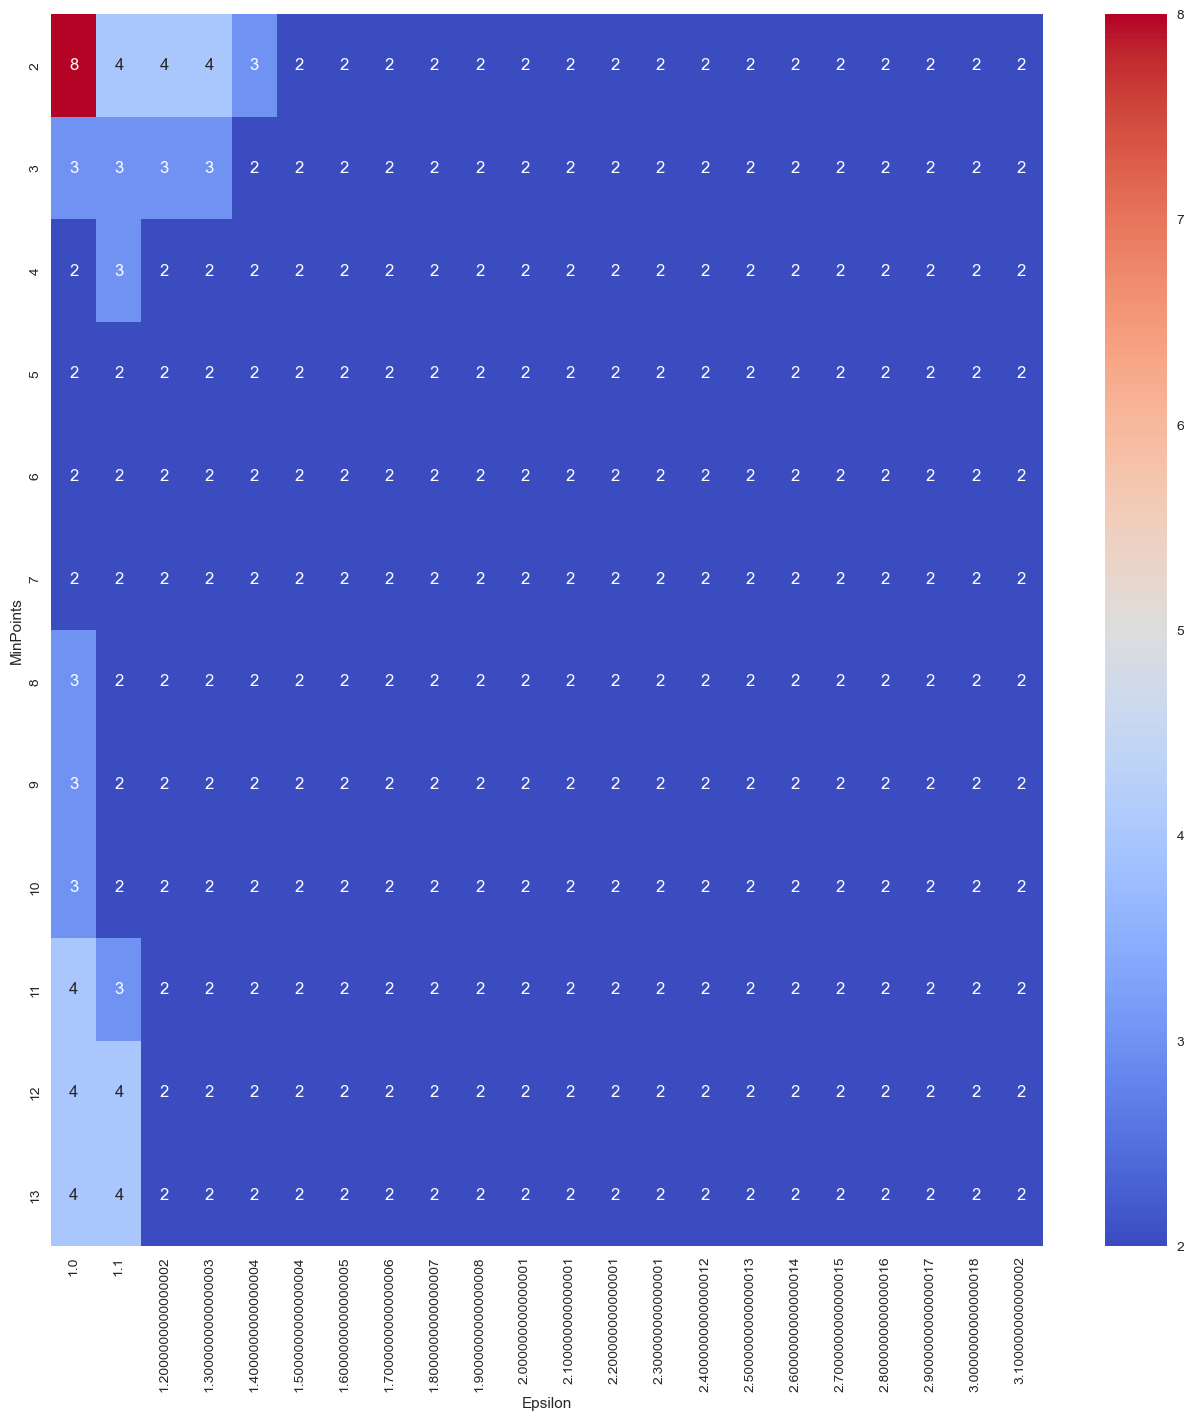

In [109]:
# Pivoteamos el df de los parámetros; los valores serán el coeficiente de silueta; el índice MinPoints y la columna Epsilon
pivotKClusters = pd.pivot_table(dfParamns, values = "KClusters", index = "MinPoints", columns = "Epsilon")

plt.figure(figsize = (16, 16))
sns.heatmap(
    pivotKClusters,
    annot = True,
    cmap = "coolwarm"
)
plt.show()

Vemos que utilizando un épsilon de 3 y 2 minpoints obtendríamos un coeficiente de silueta de 0.62 y dos clusters; vamos a construir el modelo utilizando estos parámetros.

In [110]:
# Creamos el modelo con epsilon 3 y 2 minpoints
dbscan = DBSCAN(eps = 3, min_samples = 2)
# Entrenamos el modelo y hacemos unas predicciones
predictions = dbscan.fit_predict(dfScaledPCA)
# Creamos una variable en el df para el cluster predicho
df["dbscanPCA"] = predictions
silhouette_score(dfScaledPCA, predictions)

0.6203450536137913

Efectivamente obtuvimos un coeficiente de silueta de 0.62 utilizando 2 minpoints y épsilon igual a 3.

#### Sin PCA

El procedimiento es el mismo solo que utilizaremos el conjunto de datos sin aplicarle PCA.

In [111]:
# n_neighbors es el número de vecinos y normalmente se toman las dimensiones o features y se las multiplica por 2
neighbors = NearestNeighbors(n_neighbors = 4)
# Entrenamos el algoritmo
neighborsFit = neighbors.fit(dfScaled)
# Obtenemos las distancias 
distances, index = neighborsFit.kneighbors(dfScaled)

Ya tenemos las distancias de los 4 vecinos más cercanos a cada punto, ahora graficaremos.

In [112]:
# Ordenamos las distancias por filas
distances = np.sort(distances, axis = 0)
# Nos quedamos con los más cercanos
distances = distances[:, 1]

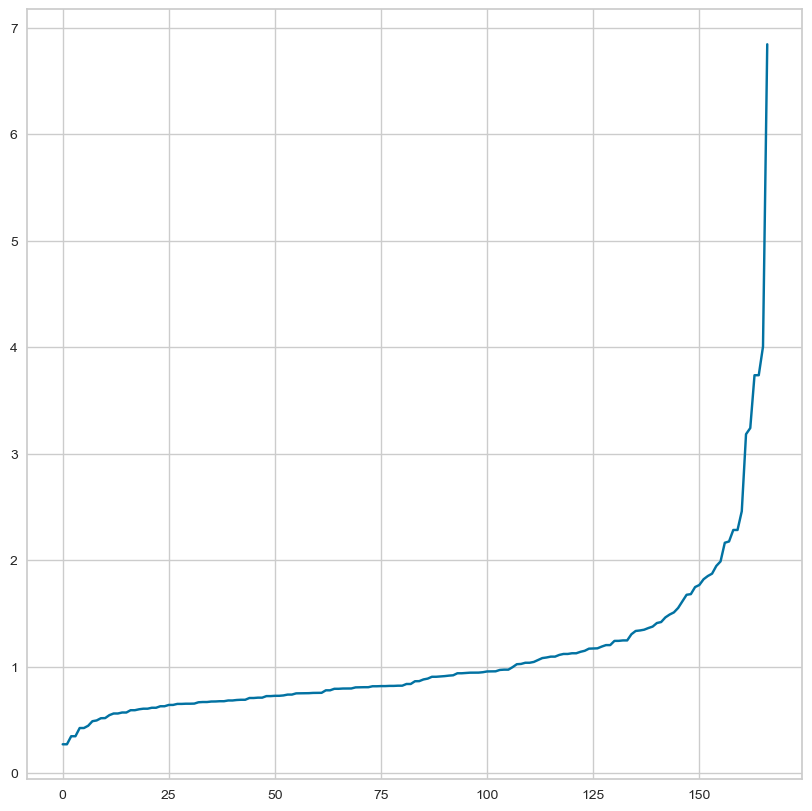

In [113]:
plt.figure(figsize = (10, 10))
plt.plot(distances)
plt.show()

Lo que buscamos es algo similiar a la metodología del codo, pero en este caso es de la rodilla ya que buscamos ese intervalo donde comienza a crecer como vemos en este caso desde 0.8 hasta 3.5; con esto pasamos a iterar con diferentes valores de épsilon y el número de minpoints.

In [114]:
# Lista de epsilons
epsilons = np.arange(0.8, 3.5, 0.1)
# Lista de minpoints
minPoints = np.arange(2, 14)

Nos apoyamos de la libería *itertools* y la clase product para crear una lista de todas las combinaciones entre epsilons y minpoints para luego iterar sobre ellos.

In [115]:
# Parámetros para el DBSCAN
paramns = list(product(epsilons, minPoints))
# Para guardar los coeficientes de silueta
silhouetteScores = []
# Para guardar el número de clusters
kClusters = []

# Iteramos
for paramn in paramns:
    # Creamos el modelo, lo entrenamos y hacemos las predicciones
    predictions = DBSCAN(eps = paramn[0], min_samples = paramn[1]).fit_predict(dfScaled)
    try:
        # Agregamos a la lista el coeficiente de silueta
        silhouetteScores.append(silhouette_score(dfScaled, predictions))
    except:
        silhouetteScores.append(0)
    kClusters.append(len(np.unique(predictions)))
    

Vamos a graficar los coeficientes de silueta.

In [116]:
# Creamos un df a partir de los parámetros
dfParamns = pd.DataFrame.from_records(paramns, columns = ["Epsilon", "MinPoints"])
# Agregamos el coeficiente de silueta
dfParamns["silScore"] = silhouetteScores
# Agregamos el número de clusters
dfParamns["KClusters"] = kClusters
# Ahora necesiamos convertir esto a una estructura matricial para un mapa de calor y para ello utilizamos pivot
# Pivoteamos el df de los parámetros; los valores serán el coeficiente de silueta; el índice MinPoints y la columna Epsilon
pivotParamns = pd.pivot_table(dfParamns, values = "silScore", index = "MinPoints", columns = "Epsilon")

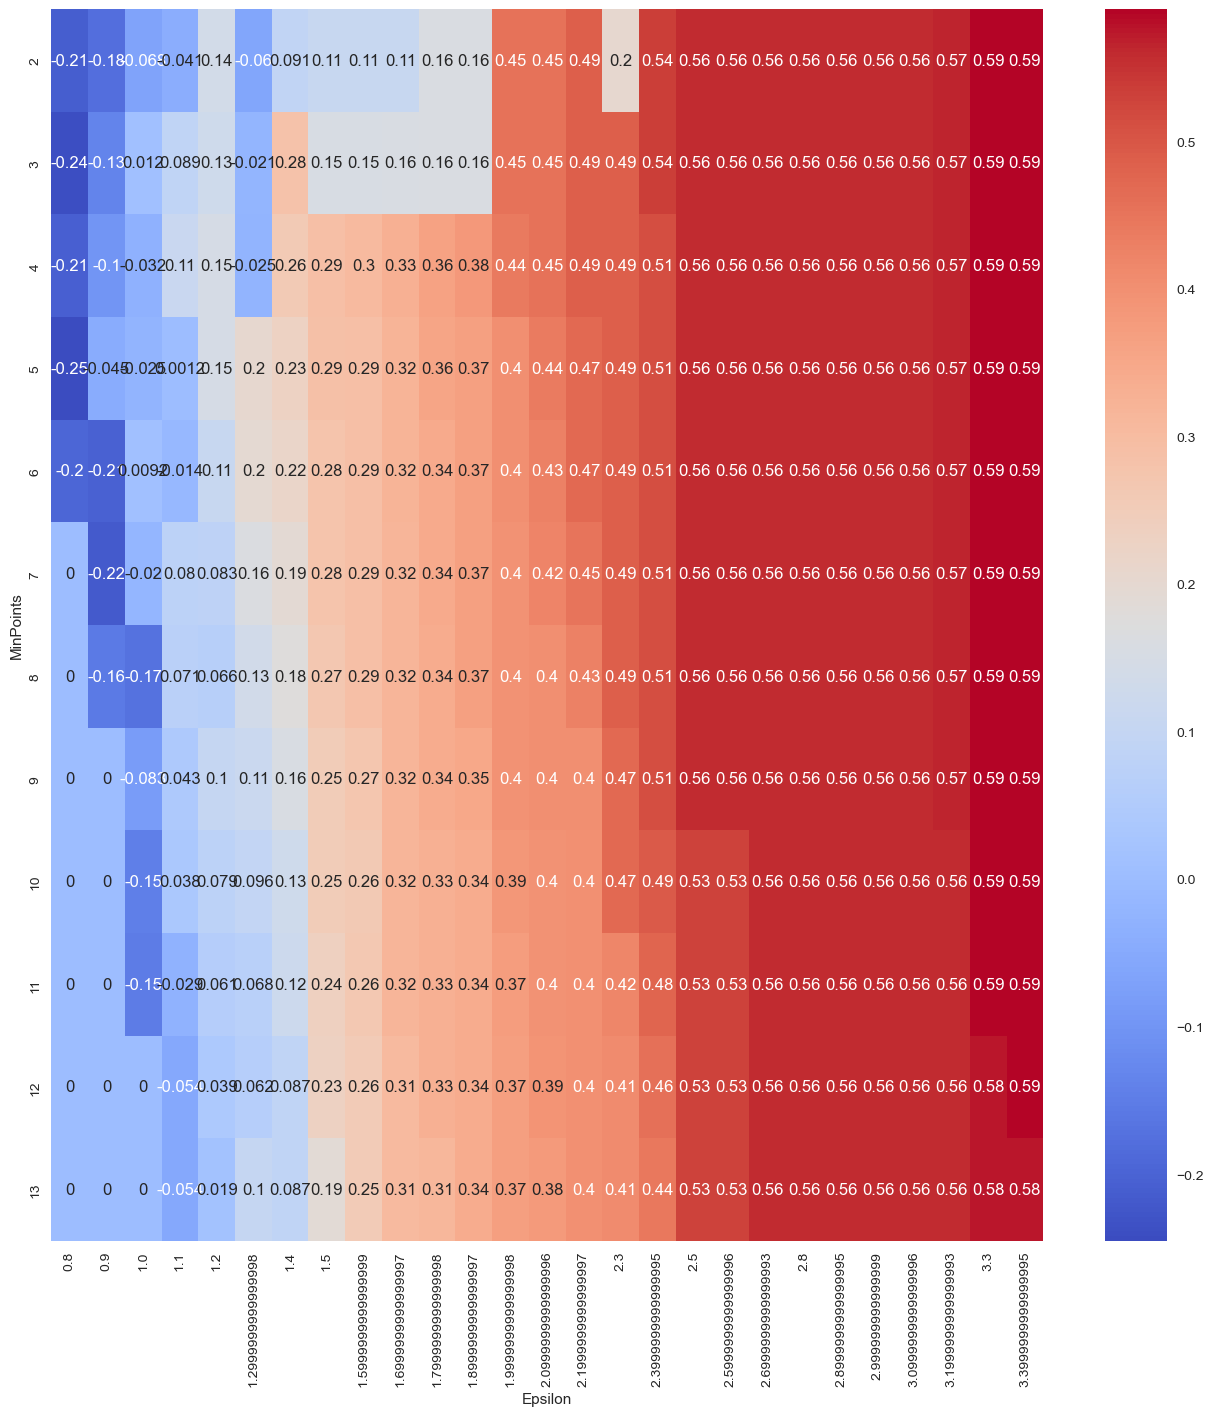

In [117]:
plt.figure(figsize = (16, 16))
sns.heatmap(
    pivotParamns,
    annot = True,
    cmap = "coolwarm"
)
plt.show()

Ahora haremos la misma gráfica pero los valores serán el número de clusters.

In [118]:
# Pivoteamos el df de los parámetros; los valores serán el coeficiente de silueta; el índice MinPoints y la columna Epsilon
pivotKClusters = pd.pivot_table(dfParamns, values = "KClusters", index = "MinPoints", columns = "Epsilon")

plt.figure(figsize = (16, 16))
sns.heatmap(
    pivotKClusters,
    annot = True,
    cmap = "coolwarm"
)
plt.show()

Vemos que utilizando 2 minpoints y un épsilon de 3.3 obtendríamos 2 clusters y un coeficiente de silueta de 0.59; vamos a construir el modelo.

In [119]:
# Creamos el modelo con epsilon 3.3 y 2 minpoints
dbscan = DBSCAN(eps = 3.3, min_samples = 2)
# Entrenamos el modelo y hacemos unas predicciones
predictions = dbscan.fit_predict(dfScaled)
# Creamos una variable en el df para el cluster predicho
df["dbscanNoPCA"] = predictions
silhouette_score(dfScaled, predictions)

0.5894700220626199

Utilizando DBSCAN sin PCA obtuvimos un coeficiente de silueta de 0.59

### Evaluación de los modelos

Luego de realizar todas las clasificaciones con distintos modelos obtuvimos el siguiente dataset.

In [120]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  KMeansPCA  KMeansNoPCA  hcPCA  \
0       9.44        56.2       5.82    553          2            4      1   
1       4.49        76.3       1.65   4090          0            1      0   
2      16.10        76.5       2.89   4460          0            1      1   
3      22.40        60.1       6.16   3530          2            4      1   
4       1.44        76.8       2.13  12200          0            1      0   

   hcNoPCA  dbscanPCA  dbscanNoPCA  
0        0          0            0  
1        0          0            0  
2        0          0            0  
3        0          0            0  
4        0          0            0

El modelo que nos dio un mayor coeficiente de silueta es el de DBSCAN con PCA pero este modelo nos arrojaba solo 2 clusters haciendo muy generales las agrupaciones; siendo así, considero que el mejor modelo es el de K-Means con PCA ya que dio como resultado 4 clusters y un coeficiente de silueta de 0.35 así que realizaremos los análisis con dicho modelo.

<Figure size 1800x1800 with 0 Axes>

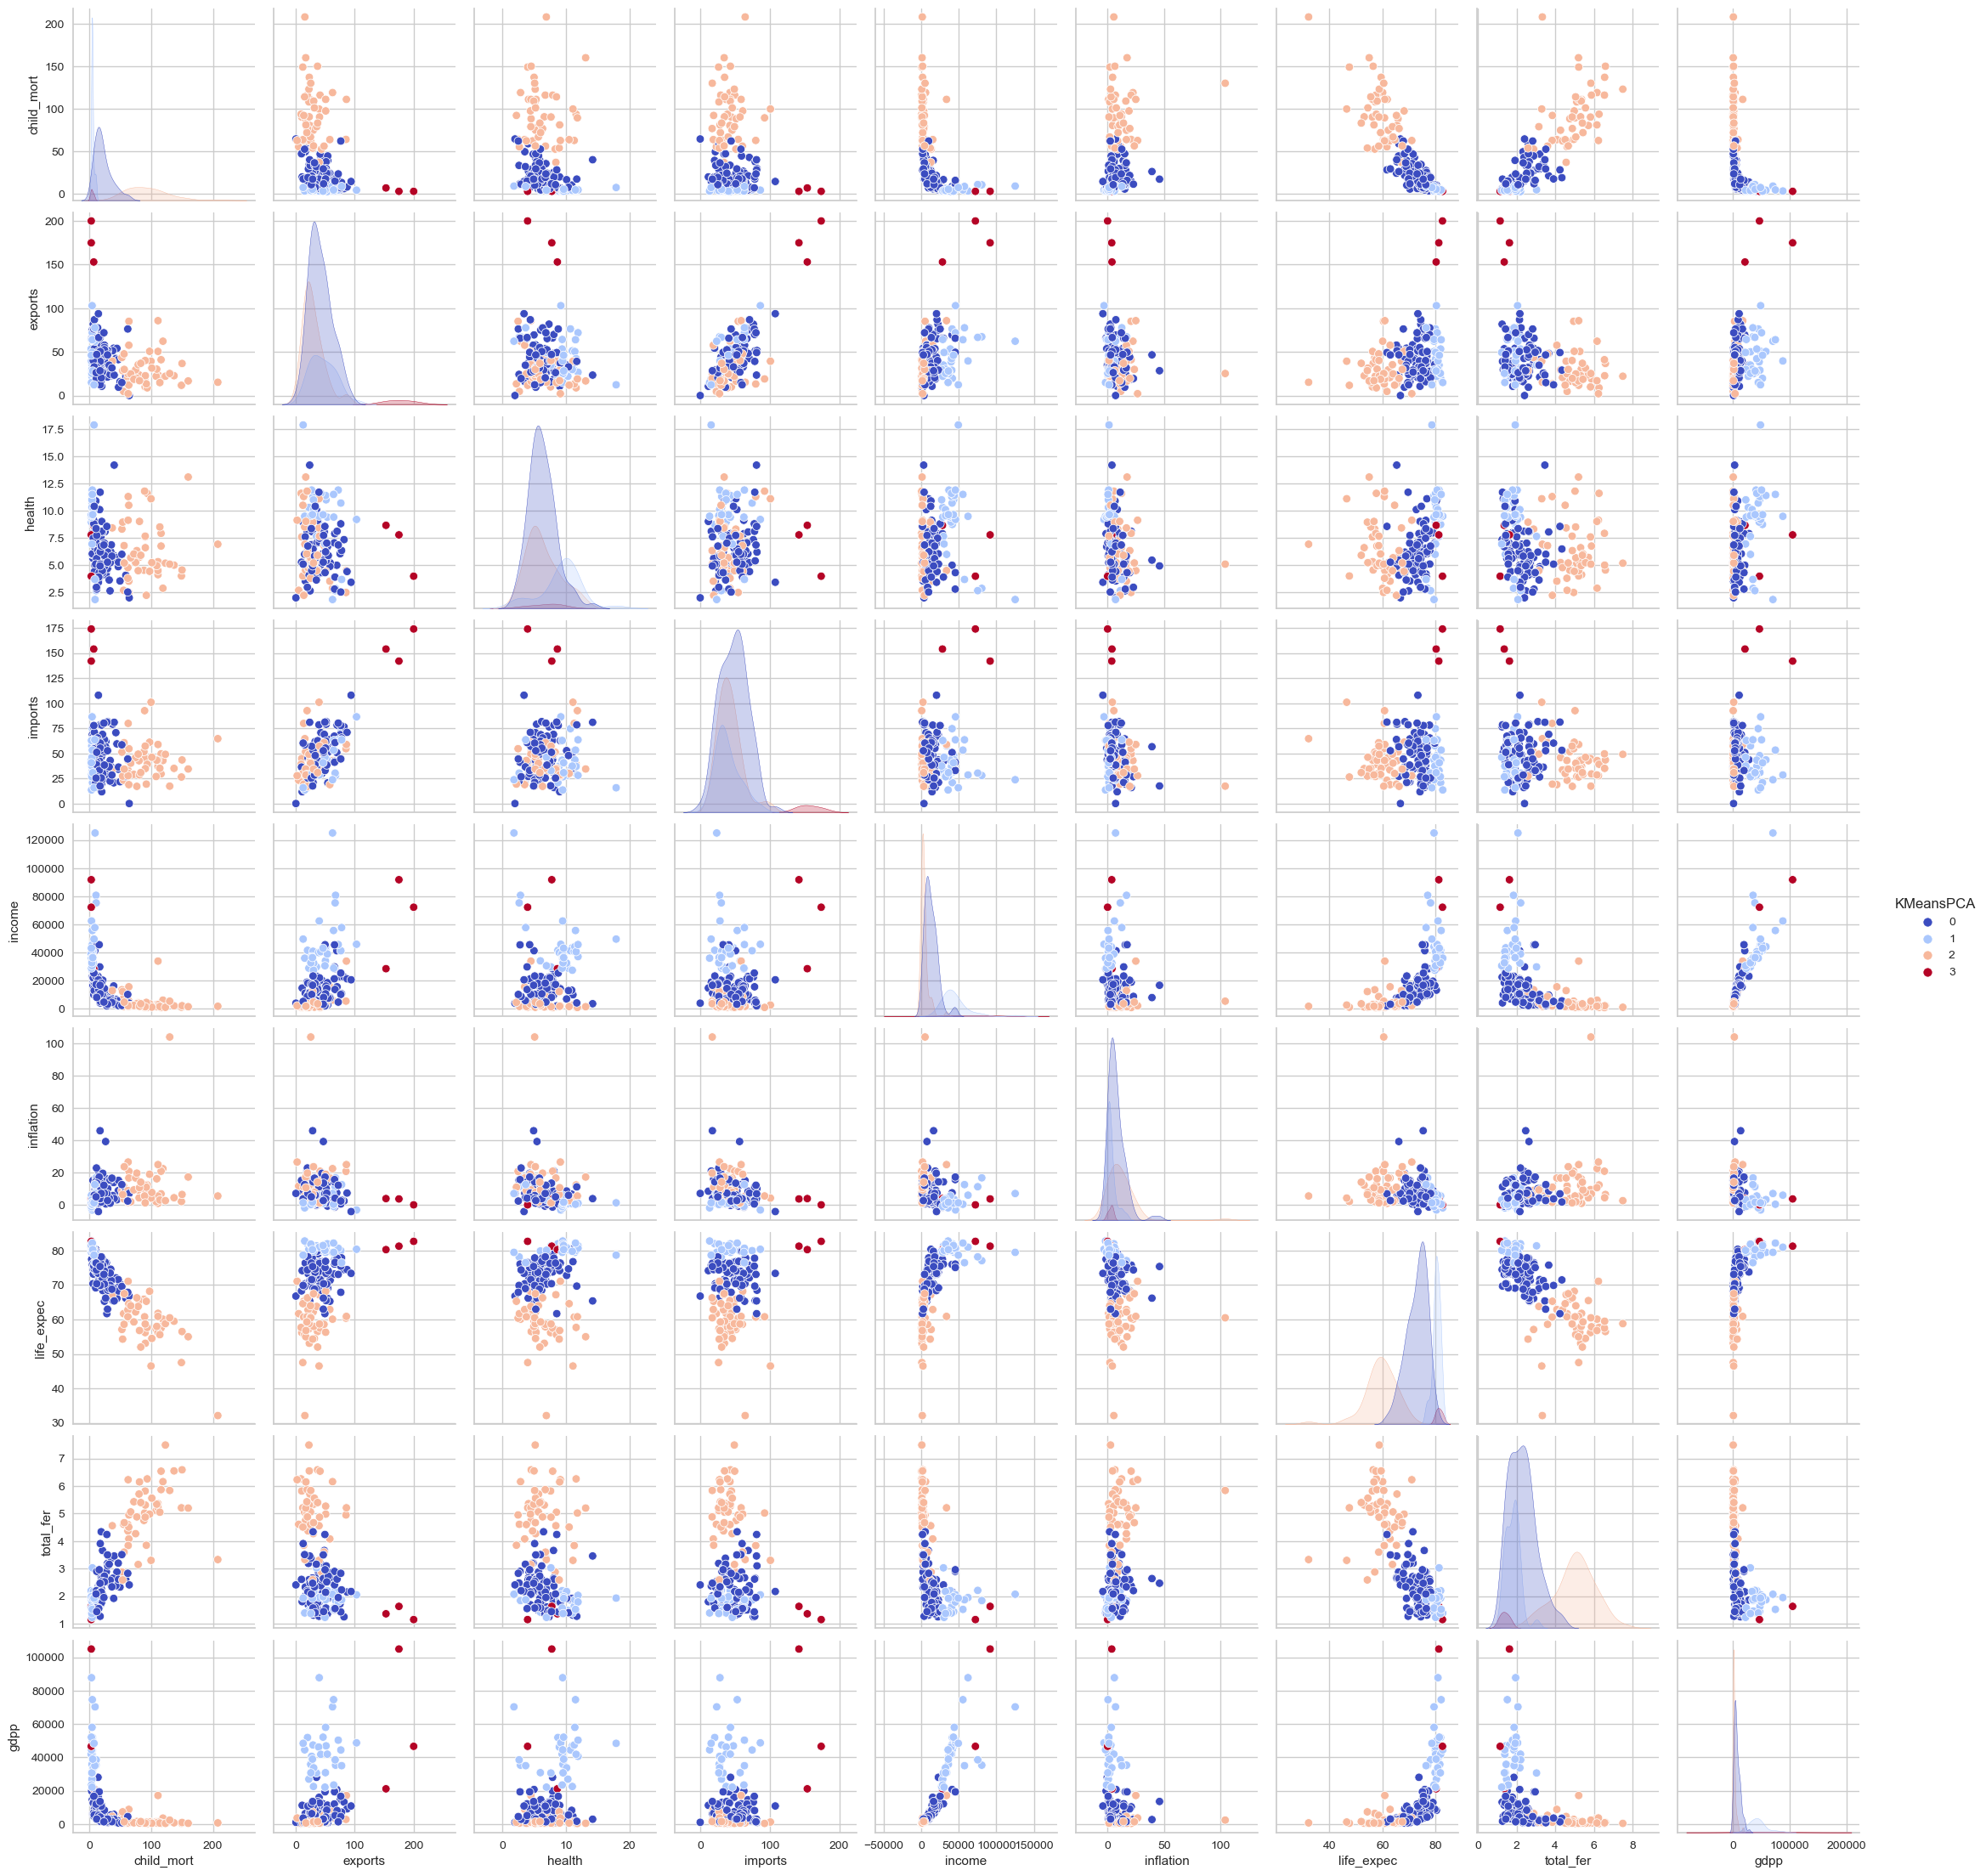

In [123]:
plt.figure(figsize = (18, 18))
sns.pairplot(
    data = df.drop(["country", "KMeansNoPCA", "hcPCA", "hcNoPCA", "dbscanPCA", "dbscanNoPCA"], axis = 1),
    hue = "KMeansPCA",
    palette = "coolwarm"
)
plt.show()

Podemos ver que existe una segmentación por los clusters que el modelo dio como resultado; vamos a analizar algunas variables por separado.

In [124]:
sns.scatterplot(
    data = df,
    x = "life_expec",
    y = "gdpp",
    hue = "KMeansPCA",
    palette = "coolwarm"
)
plt.show()

Vemos que hay una diferencia entre los distintos clusters y que los puntos de azul claro tienen una mayor esperanza de vida y un mayor GDPP y que los puntos color durazno tienen menor esperanza de vida y menor GDPP.

In [125]:
sns.scatterplot(
    data = df,
    x = "child_mort",
    y = "total_fer",
    hue = "KMeansPCA",
    palette = "coolwarm"
)
plt.show()

En esta gráfica vemos que los puntos de color durazno tienen mayor mortalidad infantil y mayor fertilidad que el resto de los clusters.

Podemos filtrar en el df los países que pertenecen a cierto grupo, en este caso vamos a buscar los que pertenecen al grupo 2 (color durazno) ya que parece que son países con problemas.

In [126]:
df[df["KMeansPCA"] == 2]

country  child_mort  exports  health  imports  income  \
0                 Afghanistan        90.2    10.00    7.58     44.9    1610   
3                      Angola       119.0    62.30    2.85     42.9    5900   
17                      Benin       111.0    23.80    4.10     37.2    1820   
21                   Botswana        52.5    43.60    8.30     51.3   13300   
25               Burkina Faso       116.0    19.20    6.74     29.6    1430   
26                    Burundi        93.6     8.92   11.60     39.2     764   
28                   Cameroon       108.0    22.20    5.13     27.0    2660   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
32                       Chad       150.0    36.80    4.53     43.5    1930   
36                    Comoros        88.2    16.50    4.51     51.7    1410   
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
38                Congo, Rep.        63.9    85.10    2.46     54.7    5190   
40              Cote d'Ivoire       111.0    50.60    5.30     43.3    2690   
49          Equatorial Guinea       111.0    85.80    4.48     58.9   33700   
50                    Eritrea        55.2     4.79    2.66     23.3    1420   
55                      Gabon        63.7    57.70    3.50     18.9   15400   
56                     Gambia        80.3    23.80    5.69     42.7    1660   
59                      Ghana        74.7    29.50    5.22     45.9    3060   
63                     Guinea       109.0    30.30    4.93     43.2    1190   
64              Guinea-Bissau       114.0    14.90    8.50     35.2    1390   
66                      Haiti       208.0    15.30    6.91     64.7    1500   
72                       Iraq        36.9    39.40    8.41     34.1   12700   
80                      Kenya        62.2    20.70    4.75     33.6    2480   
81                   Kiribati        62.7    13.30   11.30     79.9    1730   
84                        Lao        78.9    35.40    4.47     49.3    3980   
87                    Lesotho        99.7    39.40   11.10    101.0    2380   
88                    Liberia        89.3    19.10   11.80     92.6     700   
93                 Madagascar        62.2    25.00    3.77     43.0    1390   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
97                       Mali       137.0    22.80    4.98     35.1    1870   
99                 Mauritania        97.4    50.70    4.41     61.2    3320   
106                Mozambique       101.0    31.50    5.21     46.2     918   
108                   Namibia        56.0    47.80    6.78     60.7    8460   
112                     Niger       123.0    22.20    5.16     49.1     814   
113                   Nigeria       130.0    25.30    5.07     17.4    5150   
116                  Pakistan        92.1    13.50    2.20     19.4    4280   
126                    Rwanda        63.6    12.00   10.50     30.0    1350   
129                   Senegal        66.8    24.90    5.66     40.3    2180   
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   
137              South Africa        53.7    28.60    8.94     27.4   12000   
142                     Sudan        76.7    19.70    6.32     17.2    3370   
147                  Tanzania        71.9    18.70    6.01     29.1    2090   
149               Timor-Leste        62.6     2.20    9.12     27.8    1850   
150                      Togo        90.3    40.20    7.65     57.3    1210   
155                    Uganda        81.0    17.10    9.01     28.6    1540   
165                     Yemen        56.3    30.00    5.18     34.4    4480   
166                    Zambia        83.1    37.00    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  KMeansPCA  KMeansNoPCA  hcPCA  \
0        9.440        56.2       5.82    553          2            4      1   
3       22.400        60.1       6.16   3530          2            4   

Este grupo parece estar compuesto en su gran mayoría por países de África lo cual es interesante porque denota que en ellos hay una serie de problemas importantes.

Finalmente, podemos utilizar un mapa para visualizar la segmentación.

In [128]:
#%pip install pycountry

In [131]:
import pycountry
import plotly.express as px

# Función para obtener el país
def get_alpha_3(location):
    try:
        return pycountry.countries.get(name = location).alpha_3
    except:
        return None

# Creamos una copia del dt
dfMap = df.copy()
# Creamos una variable para almacenar el país en el formato que lo entiende la librería
dfMap["Code"] = df['country'].apply(lambda x: get_alpha_3(x))

# Creamos el mapa
fig = px.choropleth(
    dfMap, 
    locations = "Code", 
    color = "KMeansPCA", 
    hover_name = "country", 
    color_continuous_scale = px.colors.sequential.Plasma
)
fig.show()

Observamos que los países de África y algunos del Medio Oriente conforman un grupo; otro grupo está conformado por Latinoamérica en general, países asiáticos y algunos de la Europa Central; el tercer grupo lo conforman los países más desarrollados como Canadá, Estados Unidos, Japón, los de Europa del Oeste y los Nórdicos.

De esta manera podemos catalogar los clusters en 3: países que necesitan mucha ayuda (como los de África), países que necesitan ayuda media (como los de Latinoamérica) y países que necesitan poca ayuda (los más desarrollados).